# Change to **GPU : It is fine 😊😊😊😊** 

1.    From **Runtime**
2.   Hardware accelerator select **GPU**.



# **Installation of PyTorch**


In [0]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision


# **Numpy and PyTorch **

**Dependencies**

In [0]:
import torch 
import numpy as np

 Convert array **a** = [[1,2],[3,4]] to numpy array **A** using np.array()

In [6]:
a =[[1,2],[3,4]]
print(a)

[[1, 2], [3, 4]]


In [5]:
A = np.array(a)
print(A)

[[1 2]
 [3 4]]


Convert A to PyTorch Tensor(**A_p**) using **torch.Tensor** 

In [0]:
A_p = torch.Tensor(A)

Compare the datatype of **A** and **A_p**


In [14]:
type(A)

numpy.ndarray

In [13]:
type(A_p)

torch.FloatTensor

Convert Torch to Numpy using **torch_tensor.numpy()**

In [16]:
A_n = A_p.numpy()
type(A_n)

numpy.ndarray

# **Variable**

**Variables**

*     A Variable wraps a Tensor.
 
*  Allow accumulation of gradients.

Import the Variable class =>** from torch.autograd import Variable**

In [0]:
from torch.autograd import Variable

1.   create **a** torch tensor of ones(2,2)
2.   wrap in Variable(**a_V**) with r**equires_grad** for differentiability
3. To verify with **print(a_V.requires_grad)**


In [20]:
a = torch.ones(2,2)
a


 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [0]:
a_V = Variable((a),requires_grad=True)

In [23]:
print(a_V.requires_grad)

True


# **CS231n example**

**Define the leaf nodes** =====> variable_name = Variable(**Tensor_datatype**(**[numerical_value**]))

*   DoubleTensor - datatype
*   FloatTensor - datatype



In [0]:
#x0 = Variable(DoubleTensor([-1]))

x = Variable(DoubleTensor([-2]), requires_grad=True)
y = Variable(DoubleTensor([5]), requires_grad = True)
z = Variable(DoubleTensor([-4]), requires_grad = True)

Recall: import the from datatype class. import Tensor Datatype =>** from torch import FloatTensor, DoubleTensor**

In [0]:
 from torch import FloatTensor, DoubleTensor

Recall that the **nodes** are **operations**

In [0]:
q = x + y

In [0]:
f = q * z

In [0]:
f.backward()

brackprop with** backward()**

print the operation on each intermediate node with **node.grad_fn**

In [45]:
q.grad_fn

In [46]:
f.grad_fn

Gradient of leaf nodes(x,y,z) wr.t to last node using **node.grad**

In [47]:
z.grad

Variable containing:
 3
[torch.DoubleTensor of size 1]

**From cs231n**

1. **add** node: gradient distributor
2. **mu**l node: gradient switcher



# **Dataloader**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Recall from the last class with used this dataset

In [0]:
x = ([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
y = ([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])

Convert to numpy array using** np.array(....)** and reshape with** np.reshape(...)**

In [0]:
x_n = np.array(x, dtype=np.double)
y_n = np.array(y, dtype=np.double)

In [0]:
x_s = np.reshape(x_n,(17,1))
y_s = np.reshape(y_n,(17,1))

In [138]:
print(x_s.shape)

(17, 1)


In [0]:
from torch.utils.data import Dataset, DataLoader

import from Dataset and DataLoader using =>** from torch.utils.data import Dataset, DataLoader**



```
class dataname(Dataset):
  
  def __init__(self):


*   train_x(np.array**(x**), **dtype**=np.double} #download x
*   train_y(np.array(**y**),** dtype**=np.double} #download y
    

*   self.len = train_x.shape[0]  # length of the sample

*   self.x_data = torch.from_numpy(train_x).float()
*   self.y_data = torch.from_numpy(train_y).float()
    
 
 
 def __getitem__(self,index):
    return self.x_data[index], self.y_data[index]
    
  def __len__(self):
    return self.len
```



    
    

In [0]:
class myData(Dataset):
  def __init__(self):
      train_x = np.array(x, dtype=np.double)
      train_y = np.array(y, dtype=np.double)
      
      train_xs = np.reshape((train_x), (17,1))
      train_ys = np.reshape((train_y), (17,1))
      
      # Length of the sample
      self.len = train_x.shape[0]
      # convert to torch tensor
      self.x_data = torch.from_numpy(train_xs).float()
      self.y_data = torch.from_numpy(train_ys).float()
      
  
  def __getitem__(self,index):
      return self.x_data[index], self.y_data[index]
    
  def __len__(self):
      return self.len

Make an instance of myData class

In [0]:
myDataInstance = myData()

Feed the DataLoader 


>train_loader = DataLoader(**dataset**=....,
                          **batch_size**=....,
                          **shuffle**=....,
                          **num_workers**=...)



In [0]:
train_loader = DataLoader(dataset=myDataInstance, batch_size=1, shuffle=True, num_workers=1)

**Next Week Linear Regression bear with us**

In [0]:
import torch.nn as nn

#Step 1: Create Model Class

# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out
      

In [0]:
#Step 2: Instantiate Model Class
model = LinearRegression()

######---------GPU---------######

if torch.cuda.is_available():
    model.cuda()

In [0]:
# Step 3: Instantiate loss class
criterion = nn.MSELoss()
learning_rate = 0.0001

#Step 4: Instantiate Optimizer class
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [155]:
epochs = 1000

for epoch in range(epochs):
  for i, data in enumerate(train_loader, 0):
      # get the input
      inputs , labels = data
      
      ######---------GPU---------######
      
       #wrap with variable
      if torch.cuda.is_available():
          inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()
          
          
      else:
          inputs, labels = Variable(inputs), Variable(labels)
      
      #Clear gradient w.r.t parameters # Flag
      optimizer.zero_grad()
      
      #Forward to get output
      outputs = model(inputs)
      
      #Calculate loss
      loss = criterion(outputs, labels)
      
      # Getting gradients w.r.t parameters
      loss.backward()
    
       #updating parameters
      optimizer.step()
    
    
      print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 0, loss 0.14104194939136505
epoch 0, loss 0.1429266482591629
epoch 0, loss 0.019149500876665115
epoch 0, loss 0.22943103313446045
epoch 0, loss 0.9190438389778137
epoch 0, loss 0.30901074409484863
epoch 0, loss 0.03786465525627136
epoch 0, loss 0.0047847856767475605
epoch 0, loss 0.9909496903419495
epoch 0, loss 0.5994036793708801
epoch 0, loss 1.4224523305892944
epoch 0, loss 0.397923082113266
epoch 0, loss 0.1689516305923462
epoch 0, loss 1.1527849435806274
epoch 0, loss 0.00414495961740613
epoch 0, loss 0.008716391399502754
epoch 0, loss 0.00868930108845234
epoch 1, loss 0.16691116988658905
epoch 1, loss 0.4990442991256714
epoch 1, loss 0.009990970604121685
epoch 1, loss 1.0064876079559326
epoch 1, loss 1.0760939121246338
epoch 1, loss 0.7902060151100159
epoch 1, loss 0.014627167955040932
epoch 1, loss 0.009216357953846455
epoch 1, loss 0.3240318298339844
epoch 1, loss 0.02210608869791031
epoch 1, loss 0.22809286415576935
epoch 1, loss 1.2458523511886597
epoch 1, loss 0.000381

epoch 10, loss 0.04188574105501175
epoch 10, loss 0.11440172046422958
epoch 10, loss 0.3440971076488495
epoch 10, loss 0.24719612300395966
epoch 10, loss 0.0854015126824379
epoch 10, loss 0.4300362467765808
epoch 10, loss 1.3500893115997314
epoch 10, loss 0.4604799449443817
epoch 10, loss 0.002438743831589818
epoch 10, loss 0.031704194843769073
epoch 10, loss 0.2763425409793854
epoch 10, loss 0.09911902248859406
epoch 10, loss 0.016727708280086517
epoch 10, loss 0.00291580893099308
epoch 10, loss 0.10341756045818329
epoch 10, loss 0.8354422450065613
epoch 10, loss 0.12539523839950562
epoch 11, loss 0.08739017695188522
epoch 11, loss 0.10555282980203629
epoch 11, loss 0.09800659120082855
epoch 11, loss 0.42270565032958984
epoch 11, loss 0.7977592349052429
epoch 11, loss 0.48651421070098877
epoch 11, loss 0.004197652917355299
epoch 11, loss 0.09858380258083344
epoch 11, loss 1.3625024557113647
epoch 11, loss 0.010799363255500793
epoch 11, loss 0.004514935426414013
epoch 11, loss 0.037764

epoch 18, loss 0.5533291101455688
epoch 18, loss 0.13905157148838043
epoch 18, loss 0.11783662438392639
epoch 18, loss 1.418516993522644
epoch 18, loss 0.7345399260520935
epoch 18, loss 0.00881686806678772
epoch 19, loss 0.2544648349285126
epoch 19, loss 0.2645573914051056
epoch 19, loss 0.010293886065483093
epoch 19, loss 0.07216247916221619
epoch 19, loss 0.06991839408874512
epoch 19, loss 0.7045512199401855
epoch 19, loss 0.5610314607620239
epoch 19, loss 0.30058273673057556
epoch 19, loss 0.0007821251056157053
epoch 19, loss 0.06788134574890137
epoch 19, loss 0.01078096218407154
epoch 19, loss 1.443938136100769
epoch 19, loss 0.055585239082574844
epoch 19, loss 0.14025938510894775
epoch 19, loss 0.06875627487897873
epoch 19, loss 0.12080950289964676
epoch 19, loss 0.3101036548614502
epoch 20, loss 0.718061625957489
epoch 20, loss 1.4341740608215332
epoch 20, loss 0.2508389949798584
epoch 20, loss 0.5481138825416565
epoch 20, loss 0.07232806831598282
epoch 20, loss 0.002055029384791

epoch 27, loss 0.0012822872959077358
epoch 27, loss 0.0641927570104599
epoch 27, loss 0.3114660084247589
epoch 27, loss 0.7088556289672852
epoch 27, loss 0.14469322562217712
epoch 27, loss 1.4353669881820679
epoch 27, loss 0.05399366468191147
epoch 27, loss 0.5404887795448303
epoch 27, loss 0.11407600343227386
epoch 27, loss 0.3281041085720062
epoch 27, loss 0.07260019332170486
epoch 27, loss 0.009230668656527996
epoch 27, loss 0.07117202132940292
epoch 27, loss 0.24302951991558075
epoch 27, loss 0.0632818192243576
epoch 27, loss 0.26566290855407715
epoch 27, loss 0.011880265548825264
epoch 28, loss 0.06767099350690842
epoch 28, loss 0.0009486757917329669
epoch 28, loss 0.010479231365025043
epoch 28, loss 0.3145970106124878
epoch 28, loss 0.01156203355640173
epoch 28, loss 0.23670384287834167
epoch 28, loss 0.12774817645549774
epoch 28, loss 0.0629367083311081
epoch 28, loss 0.056996315717697144
epoch 28, loss 0.06716813147068024
epoch 28, loss 0.14466330409049988
epoch 28, loss 1.4350

epoch 38, loss 0.07038208842277527
epoch 38, loss 0.5656881332397461
epoch 38, loss 0.001057398971170187
epoch 38, loss 0.26218199729919434
epoch 38, loss 0.3106752038002014
epoch 38, loss 0.1409337967634201
epoch 38, loss 0.2421513795852661
epoch 38, loss 0.011457214131951332
epoch 38, loss 0.2927038371562958
epoch 38, loss 0.0654548704624176
epoch 38, loss 0.057104744017124176
epoch 38, loss 0.05655626952648163
epoch 38, loss 1.4569889307022095
epoch 38, loss 0.1289912462234497
epoch 38, loss 0.010326252318918705
epoch 38, loss 0.6915763020515442
epoch 38, loss 0.057353246957063675
epoch 39, loss 0.057110100984573364
epoch 39, loss 0.013177118264138699
epoch 39, loss 0.05734999477863312
epoch 39, loss 0.1319829672574997
epoch 39, loss 0.682933509349823
epoch 39, loss 0.05422915145754814
epoch 39, loss 0.2593920826911926
epoch 39, loss 0.5946353673934937
epoch 39, loss 0.1556372195482254
epoch 39, loss 0.21256648004055023
epoch 39, loss 0.3233163356781006
epoch 39, loss 0.012343809939

epoch 50, loss 0.00048604054609313607
epoch 50, loss 1.4441395998001099
epoch 50, loss 0.011551140807569027
epoch 50, loss 0.06199521943926811
epoch 50, loss 0.2815457880496979
epoch 50, loss 0.6774246692657471
epoch 50, loss 0.31950047612190247
epoch 50, loss 0.07445872575044632
epoch 50, loss 0.011302882805466652
epoch 50, loss 0.5752211213111877
epoch 50, loss 0.05921204388141632
epoch 50, loss 0.05571212247014046
epoch 50, loss 0.26140284538269043
epoch 50, loss 0.22331446409225464
epoch 50, loss 0.06371432542800903
epoch 50, loss 0.13355502486228943
epoch 50, loss 0.14983993768692017
epoch 51, loss 0.06961379200220108
epoch 51, loss 0.6875778436660767
epoch 51, loss 0.26320815086364746
epoch 51, loss 0.010986635461449623
epoch 51, loss 0.13153986632823944
epoch 51, loss 0.06543248891830444
epoch 51, loss 0.570006787776947
epoch 51, loss 0.0007945224642753601
epoch 51, loss 0.3103393614292145
epoch 51, loss 0.23056942224502563
epoch 51, loss 1.4410042762756348
epoch 51, loss 0.0535

epoch 61, loss 0.2599264979362488
epoch 61, loss 0.010452644899487495
epoch 61, loss 0.00039457230013795197
epoch 61, loss 0.012922926805913448
epoch 61, loss 0.06556978076696396
epoch 61, loss 0.13096201419830322
epoch 61, loss 0.054377660155296326
epoch 61, loss 0.5648520588874817
epoch 61, loss 0.30608999729156494
epoch 61, loss 0.23401762545108795
epoch 61, loss 0.6913285255432129
epoch 61, loss 1.4445908069610596
epoch 61, loss 0.058592554181814194
epoch 62, loss 0.1466708481311798
epoch 62, loss 0.5610104203224182
epoch 62, loss 1.4222803115844727
epoch 62, loss 0.11740097403526306
epoch 62, loss 0.0709608793258667
epoch 62, loss 0.009569973684847355
epoch 62, loss 0.001865438069216907
epoch 62, loss 0.05052056536078453
epoch 62, loss 0.06874702870845795
epoch 62, loss 0.06108521670103073
epoch 62, loss 0.007959281094372272
epoch 62, loss 0.7158316969871521
epoch 62, loss 0.3044569492340088
epoch 62, loss 0.23729927837848663
epoch 62, loss 0.06896618008613586
epoch 62, loss 0.280


epoch 74, loss 0.5682775974273682
epoch 74, loss 0.009087922982871532
epoch 74, loss 0.3043815791606903
epoch 74, loss 1.421193242073059
epoch 74, loss 0.11822373420000076
epoch 74, loss 0.30157068371772766
epoch 74, loss 0.2513793706893921
epoch 74, loss 0.06284857541322708
epoch 74, loss 0.04992130026221275
epoch 74, loss 0.06696487218141556
epoch 74, loss 0.23576128482818604
epoch 74, loss 0.0008671725518070161
epoch 74, loss 0.011135503649711609
epoch 74, loss 0.6964671611785889
epoch 74, loss 0.06644061207771301
epoch 74, loss 0.14795653522014618
epoch 75, loss 0.06919296085834503
epoch 75, loss 0.05978895723819733
epoch 75, loss 0.21939052641391754
epoch 75, loss 0.0644826740026474
epoch 75, loss 0.2574966549873352
epoch 75, loss 1.457980751991272
epoch 75, loss 0.010652519762516022
epoch 75, loss 0.31122177839279175
epoch 75, loss 0.5723817348480225
epoch 75, loss 0.14451190829277039
epoch 75, loss 0.01126155350357294
epoch 75, loss 0.051580969244241714
epoch 75, loss 0.2521751


epoch 86, loss 0.14662957191467285
epoch 86, loss 0.5634255409240723
epoch 86, loss 0.2285192608833313
epoch 86, loss 0.05592493340373039
epoch 86, loss 0.06692557036876678
epoch 86, loss 0.2528952956199646
epoch 86, loss 1.432411789894104
epoch 86, loss 0.0007923062657937407
epoch 86, loss 0.2769278883934021
epoch 86, loss 0.056990284472703934
epoch 86, loss 0.30732640624046326
epoch 86, loss 0.012393208220601082
epoch 86, loss 0.052103351801633835
epoch 87, loss 0.05430490896105766
epoch 87, loss 0.00973689928650856
epoch 87, loss 0.2143494039773941
epoch 87, loss 0.00011867535067722201
epoch 87, loss 0.6698041558265686
epoch 87, loss 0.3138960003852844
epoch 87, loss 0.014654170721769333
epoch 87, loss 0.05464206635951996
epoch 87, loss 0.25564664602279663
epoch 87, loss 0.25052884221076965
epoch 87, loss 0.5922256708145142
epoch 87, loss 0.15236110985279083
epoch 87, loss 1.4418443441390991
epoch 87, loss 0.06944656372070312
epoch 87, loss 0.06837882101535797
epoch 87, loss 0.0583

epoch 99, loss 0.26891428232192993
epoch 99, loss 0.07223089039325714
epoch 99, loss 0.056516245007514954
epoch 99, loss 0.00020639997092075646
epoch 99, loss 0.051832523196935654
epoch 99, loss 0.5714484453201294
epoch 99, loss 0.06907679885625839
epoch 99, loss 1.4248071908950806
epoch 99, loss 0.00804394856095314
epoch 99, loss 0.05946316942572594
epoch 99, loss 0.010875933803617954
epoch 99, loss 0.2986602485179901
epoch 99, loss 0.12187755107879639
epoch 99, loss 0.13740143179893494
epoch 99, loss 0.23529335856437683
epoch 99, loss 0.698969304561615
epoch 99, loss 0.24827052652835846
epoch 100, loss 0.058993179351091385
epoch 100, loss 0.127868190407753
epoch 100, loss 0.24752403795719147
epoch 100, loss 0.14217132329940796
epoch 100, loss 0.06553187221288681
epoch 100, loss 1.410797357559204
epoch 100, loss 0.008998909033834934
epoch 100, loss 0.7146521210670471
epoch 100, loss 0.007868905551731586
epoch 100, loss 0.2290947288274765
epoch 100, loss 0.2996891736984253
epoch 100, l

epoch 111, loss 0.3020300269126892
epoch 111, loss 0.05000683665275574
epoch 111, loss 0.05722981318831444
epoch 111, loss 0.2107183039188385
epoch 111, loss 0.046783220022916794
epoch 111, loss 0.24954572319984436
epoch 111, loss 0.00992024689912796
epoch 111, loss 6.199631025083363e-05
epoch 111, loss 0.013462596572935581
epoch 111, loss 0.15011434257030487
epoch 111, loss 0.07279947400093079
epoch 111, loss 0.2565186023712158
epoch 111, loss 0.5814415812492371
epoch 111, loss 1.42825448513031
epoch 111, loss 0.06992135941982269
epoch 112, loss 0.0691063180565834
epoch 112, loss 0.21426507830619812
epoch 112, loss 0.30289268493652344
epoch 112, loss 0.055645398795604706
epoch 112, loss 0.673895537853241
epoch 112, loss 0.5861831307411194
epoch 112, loss 0.13183645904064178
epoch 112, loss 0.24659743905067444
epoch 112, loss 0.07070592790842056
epoch 112, loss 0.011571290902793407
epoch 112, loss 0.14350436627864838
epoch 112, loss 1.4155809879302979
epoch 112, loss 0.0010832322295755

epoch 123, loss 0.00041479148785583675
epoch 123, loss 0.2613334357738495
epoch 123, loss 0.0731072872877121
epoch 123, loss 0.14616014063358307
epoch 123, loss 0.6828227639198303
epoch 123, loss 0.24550503492355347
epoch 123, loss 0.06599458307027817
epoch 123, loss 0.009420127607882023
epoch 123, loss 0.20276577770709991
epoch 123, loss 0.5864054560661316
epoch 123, loss 0.05362753942608833
epoch 123, loss 0.04567179083824158
epoch 123, loss 0.013736709952354431
epoch 123, loss 1.4367367029190063
epoch 123, loss 0.1297197788953781
epoch 123, loss 0.2976202368736267
epoch 123, loss 0.04820665717124939
epoch 124, loss 0.000465705874375999
epoch 124, loss 0.5616934895515442
epoch 124, loss 0.06239144876599312
epoch 124, loss 0.010337715037167072
epoch 124, loss 0.2400108277797699
epoch 124, loss 0.13810262084007263
epoch 124, loss 0.7042510509490967
epoch 124, loss 1.4125508069992065
epoch 124, loss 0.22731252014636993
epoch 124, loss 0.12375281751155853
epoch 124, loss 0.05698516219854

epoch 134, loss 0.07027561217546463
epoch 134, loss 0.047584179788827896
epoch 134, loss 0.007949074730277061
epoch 134, loss 0.2393752485513687
epoch 134, loss 0.26212579011917114
epoch 134, loss 0.07204992324113846
epoch 134, loss 0.127910315990448
epoch 134, loss 1.4132238626480103
epoch 134, loss 0.06184227392077446
epoch 134, loss 0.13940973579883575
epoch 134, loss 0.0008123904699459672
epoch 134, loss 0.22283363342285156
epoch 135, loss 0.21515241265296936
epoch 135, loss 0.07145381718873978
epoch 135, loss 0.06912336498498917
epoch 135, loss 0.0480918250977993
epoch 135, loss 0.0002552767691668123
epoch 135, loss 0.056146733462810516
epoch 135, loss 0.24113748967647552
epoch 135, loss 0.1285713165998459
epoch 135, loss 0.25721168518066406
epoch 135, loss 0.575771689414978
epoch 135, loss 0.29476380348205566
epoch 135, loss 0.6879578828811646
epoch 135, loss 0.047259371727705
epoch 135, loss 1.4282960891723633
epoch 135, loss 0.011484741233289242
epoch 135, loss 0.00807416997849

epoch 145, loss 0.06945611536502838
epoch 145, loss 0.14454616606235504
epoch 145, loss 0.6840865612030029
epoch 145, loss 0.20098881423473358
epoch 145, loss 0.13546016812324524
epoch 145, loss 0.24064676463603973
epoch 145, loss 4.756165435537696e-05
epoch 145, loss 0.048477619886398315
epoch 145, loss 1.4243541955947876
epoch 145, loss 0.007854065857827663
epoch 145, loss 0.2926120162010193
epoch 145, loss 0.5612078905105591
epoch 145, loss 0.062049370259046555
epoch 145, loss 0.05454853177070618
epoch 146, loss 0.5594157576560974
epoch 146, loss 0.2239864617586136
epoch 146, loss 0.007285666652023792
epoch 146, loss 1.4038398265838623
epoch 146, loss 0.23299065232276917
epoch 146, loss 0.0011265322100371122
epoch 146, loss 0.7069118618965149
epoch 146, loss 0.12295497208833694
epoch 146, loss 0.06514610350131989
epoch 146, loss 0.27210038900375366
epoch 146, loss 0.14062392711639404
epoch 146, loss 0.045305922627449036
epoch 146, loss 0.28855398297309875
epoch 146, loss 0.009526804

epoch 157, loss 0.2947555184364319
epoch 157, loss 0.07295291125774384
epoch 157, loss 0.047347523272037506
epoch 157, loss 0.01202066894620657
epoch 157, loss 0.053970176726579666
epoch 157, loss 0.576161801815033
epoch 157, loss 0.07011225819587708
epoch 157, loss 1.4123011827468872
epoch 157, loss 0.0004922098596580327
epoch 157, loss 0.007017798721790314
epoch 157, loss 0.12295948714017868
epoch 157, loss 0.2317315638065338
epoch 157, loss 0.2212015688419342
epoch 157, loss 0.25764837861061096
epoch 157, loss 0.1446468085050583
epoch 157, loss 0.045791350305080414
epoch 158, loss 0.6836926341056824
epoch 158, loss 0.012358224019408226
epoch 158, loss 0.13086436688899994
epoch 158, loss 0.04671754315495491
epoch 158, loss 0.2938111126422882
epoch 158, loss 0.072210393846035
epoch 158, loss 0.20687243342399597
epoch 158, loss 0.00831865705549717
epoch 158, loss 0.5752822756767273
epoch 158, loss 0.05667755752801895
epoch 158, loss 0.23492227494716644
epoch 158, loss 0.045738663524389

epoch 167, loss 0.009512358345091343
epoch 167, loss 0.05426602438092232
epoch 167, loss 0.0066839647479355335
epoch 167, loss 1.395889163017273
epoch 167, loss 0.06271177530288696
epoch 167, loss 0.0417180061340332
epoch 167, loss 0.06570165604352951
epoch 167, loss 0.07677850872278214
epoch 167, loss 0.5470412373542786
epoch 167, loss 0.11406069993972778
epoch 167, loss 0.28537291288375854
epoch 167, loss 0.28083300590515137
epoch 167, loss 0.0012266087578609586
epoch 167, loss 0.22808842360973358
epoch 167, loss 0.7002914547920227
epoch 168, loss 0.01051472406834364
epoch 168, loss 0.286747545003891
epoch 168, loss 1.3971998691558838
epoch 168, loss 0.26957887411117554
epoch 168, loss 0.04379542917013168
epoch 168, loss 0.22990229725837708
epoch 168, loss 0.21665972471237183
epoch 168, loss 0.563004732131958
epoch 168, loss 0.06084585562348366
epoch 168, loss 0.05202050134539604
epoch 168, loss 0.12436651438474655
epoch 168, loss 0.006657365243881941
epoch 168, loss 0.69371217489242

epoch 178, loss 0.008263536728918552
epoch 178, loss 0.2776658833026886
epoch 178, loss 0.27720800042152405
epoch 178, loss 0.0059434049762785435
epoch 178, loss 0.11871512234210968
epoch 178, loss 0.13255126774311066
epoch 178, loss 0.0588914193212986
epoch 178, loss 0.07705748826265335
epoch 178, loss 0.000821699679363519
epoch 178, loss 0.06232857704162598
epoch 178, loss 0.6979981064796448
epoch 178, loss 0.04376300424337387
epoch 178, loss 0.0691387876868248
epoch 178, loss 0.2115706503391266
epoch 179, loss 0.12693379819393158
epoch 179, loss 0.0002742519718594849
epoch 179, loss 0.14053936302661896
epoch 179, loss 0.5587500929832458
epoch 179, loss 0.054846737533807755
epoch 179, loss 0.6966553926467896
epoch 179, loss 0.2062487155199051
epoch 179, loss 0.23800316452980042
epoch 179, loss 0.23343409597873688
epoch 179, loss 0.06640908867120743
epoch 179, loss 0.049231138080358505
epoch 179, loss 0.2944144010543823
epoch 179, loss 0.013035459443926811
epoch 179, loss 0.0083476686

epoch 190, loss 0.2084299623966217
epoch 190, loss 0.6778333187103271
epoch 190, loss 0.14778472483158112
epoch 190, loss 0.2292603999376297
epoch 190, loss 0.07370985299348831
epoch 190, loss 0.04454312473535538
epoch 190, loss 0.0688672885298729
epoch 190, loss 0.007660231087356806
epoch 190, loss 0.2881138324737549
epoch 190, loss 0.12922100722789764
epoch 190, loss 0.01094938162714243
epoch 190, loss 1.4013019800186157
epoch 190, loss 0.05892324447631836
epoch 190, loss 0.2495129108428955
epoch 190, loss 0.04377248138189316
epoch 190, loss 0.0001029635313898325
epoch 190, loss 0.5701054334640503
epoch 191, loss 0.0682171955704689
epoch 191, loss 0.050647489726543427
epoch 191, loss 0.22555509209632874
epoch 191, loss 0.6906265616416931
epoch 191, loss 0.054085999727249146
epoch 191, loss 5.1730232371483e-05
epoch 191, loss 1.407797932624817
epoch 191, loss 0.13990958034992218
epoch 191, loss 0.251240611076355
epoch 191, loss 0.5695666074752808
epoch 191, loss 0.07333218306303024
ep

epoch 203, loss 0.5555098652839661
epoch 203, loss 0.27442315220832825
epoch 203, loss 0.2187979370355606
epoch 203, loss 0.22495564818382263
epoch 203, loss 0.0769411101937294
epoch 203, loss 0.008914227597415447
epoch 203, loss 0.11909610033035278
epoch 203, loss 0.0007990449666976929
epoch 203, loss 0.005280042998492718
epoch 203, loss 0.262320876121521
epoch 203, loss 1.386765956878662
epoch 203, loss 0.062408242374658585
epoch 203, loss 0.6995427012443542
epoch 203, loss 0.06922858953475952
epoch 203, loss 0.048674408346414566
epoch 204, loss 0.06945008039474487
epoch 204, loss 0.07389839738607407
epoch 204, loss 0.20578598976135254
epoch 204, loss 0.5704932808876038
epoch 204, loss 0.6882315874099731
epoch 204, loss 0.043056242167949677
epoch 204, loss 0.13022930920124054
epoch 204, loss 0.28350409865379333
epoch 204, loss 0.1414170116186142
epoch 204, loss 0.24340084195137024
epoch 204, loss 1.4044206142425537
epoch 204, loss 0.22307156026363373
epoch 204, loss 0.006186122074723

epoch 215, loss 0.07343228906393051
epoch 215, loss 1.3961129188537598
epoch 215, loss 0.009497574530541897
epoch 215, loss 0.2763533294200897
epoch 215, loss 0.12023822218179703
epoch 215, loss 0.0006211245781742036
epoch 215, loss 0.05160880461335182
epoch 215, loss 0.21869033575057983
epoch 215, loss 0.25303971767425537
epoch 215, loss 0.07318447530269623
epoch 215, loss 0.5659786462783813
epoch 215, loss 0.209566131234169
epoch 215, loss 0.13947650790214539
epoch 215, loss 0.05712571367621422
epoch 215, loss 0.006117885001003742
epoch 216, loss 0.6846842169761658
epoch 216, loss 0.051915060728788376
epoch 216, loss 0.007116992492228746
epoch 216, loss 0.13067865371704102
epoch 216, loss 0.04200639948248863
epoch 216, loss 0.281289666891098
epoch 216, loss 0.07179237902164459
epoch 216, loss 0.19690150022506714
epoch 216, loss 0.2244836688041687
epoch 216, loss 5.279887045617215e-05
epoch 216, loss 0.5899256467819214
epoch 216, loss 0.07570650428533554
epoch 216, loss 0.144016742706

epoch 226, loss 0.22767117619514465
epoch 226, loss 0.04835334047675133
epoch 226, loss 0.18199771642684937
epoch 226, loss 0.013818398118019104
epoch 226, loss 0.03301921859383583
epoch 226, loss 0.0637303963303566
epoch 226, loss 0.15504953265190125
epoch 226, loss 0.13911007344722748
epoch 226, loss 0.04367835447192192
epoch 226, loss 0.08031586557626724
epoch 226, loss 0.22309182584285736
epoch 226, loss 0.00730228191241622
epoch 226, loss 0.2835333049297333
epoch 226, loss 0.579943060874939
epoch 226, loss 1.39291250705719
epoch 227, loss 0.12212154269218445
epoch 227, loss 0.21612143516540527
epoch 227, loss 0.059798166155815125
epoch 227, loss 0.005385200958698988
epoch 227, loss 0.2733488380908966
epoch 227, loss 0.6976662874221802
epoch 227, loss 0.23855061829090118
epoch 227, loss 1.397674560546875
epoch 227, loss 0.03986847400665283
epoch 227, loss 0.04547248035669327
epoch 227, loss 0.07274345308542252
epoch 227, loss 0.010527783073484898
epoch 227, loss 0.14055563509464264

epoch 238, loss 0.2126585990190506
epoch 238, loss 0.27210289239883423
epoch 238, loss 0.0050527178682386875
epoch 238, loss 0.0378153994679451
epoch 238, loss 0.11907009780406952
epoch 238, loss 0.25289031863212585
epoch 238, loss 0.05711385980248451
epoch 238, loss 0.13769729435443878
epoch 238, loss 0.07556592673063278
epoch 238, loss 0.6865221261978149
epoch 238, loss 0.07353725284337997
epoch 238, loss 6.0362741351127625e-05
epoch 238, loss 0.01036461628973484
epoch 238, loss 0.5678164958953857
epoch 238, loss 0.0465988889336586
epoch 238, loss 0.2151251584291458
epoch 239, loss 0.06861768662929535
epoch 239, loss 0.12072118371725082
epoch 239, loss 0.24867995083332062
epoch 239, loss 0.05575625225901604
epoch 239, loss 0.005794474855065346
epoch 239, loss 0.6815309524536133
epoch 239, loss 0.14395485818386078
epoch 239, loss 0.27730002999305725
epoch 239, loss 0.04184695705771446
epoch 239, loss 1.8913742678705603e-05
epoch 239, loss 0.573216438293457
epoch 239, loss 0.2007887810

epoch 249, loss 0.05594523251056671
epoch 249, loss 0.13836944103240967
epoch 249, loss 0.12257354706525803
epoch 249, loss 0.20512202382087708
epoch 249, loss 0.0001078786954167299
epoch 249, loss 0.2135097235441208
epoch 249, loss 0.06985694169998169
epoch 249, loss 0.07572238147258759
epoch 249, loss 0.03809795528650284
epoch 249, loss 0.5605890154838562
epoch 249, loss 1.366740345954895
epoch 249, loss 0.7109395265579224
epoch 249, loss 0.2462012767791748
epoch 249, loss 0.009517637081444263
epoch 249, loss 0.005297728348523378
epoch 249, loss 0.04447019100189209
epoch 249, loss 0.2726219892501831
epoch 250, loss 0.12290465086698532
epoch 250, loss 0.13499164581298828
epoch 250, loss 0.0775926411151886
epoch 250, loss 0.008795098401606083
epoch 250, loss 0.058300670236349106
epoch 250, loss 0.558340311050415
epoch 250, loss 0.20983870327472687
epoch 250, loss 0.2521003186702728
epoch 250, loss 0.2042381763458252
epoch 250, loss 0.04250846058130264
epoch 250, loss 1.3865121603012085


epoch 260, loss 0.24903486669063568
epoch 260, loss 0.26824212074279785
epoch 260, loss 0.03637387603521347
epoch 260, loss 0.00460606487467885
epoch 260, loss 0.00037460908060893416
epoch 260, loss 0.05875471979379654
epoch 260, loss 0.1344132423400879
epoch 260, loss 0.6961361169815063
epoch 260, loss 1.377967357635498
epoch 260, loss 0.046789612621068954
epoch 260, loss 0.20241336524486542
epoch 260, loss 0.07404235005378723
epoch 260, loss 0.1261020451784134
epoch 260, loss 0.07069692015647888
epoch 260, loss 0.009205145761370659
epoch 260, loss 0.20993509888648987
epoch 261, loss 0.12107931077480316
epoch 261, loss 0.13301397860050201
epoch 261, loss 0.035682305693626404
epoch 261, loss 0.24793171882629395
epoch 261, loss 0.07626434415578842
epoch 261, loss 0.269378125667572
epoch 261, loss 0.6894160509109497
epoch 261, loss 1.3837215900421143
epoch 261, loss 0.044347699731588364
epoch 261, loss 0.197668194770813
epoch 261, loss 0.010381395928561687
epoch 261, loss 0.570611059665

epoch 272, loss 0.2670137882232666
epoch 272, loss 1.3672523498535156
epoch 272, loss 0.11603695899248123
epoch 272, loss 0.007192537188529968
epoch 272, loss 0.06223408877849579
epoch 272, loss 0.12612135708332062
epoch 272, loss 0.0011432383907958865
epoch 272, loss 0.05448818579316139
epoch 272, loss 0.0036167639773339033
epoch 272, loss 0.08294989913702011
epoch 272, loss 0.5411820411682129
epoch 272, loss 0.0667204037308693
epoch 272, loss 0.2592291235923767
epoch 272, loss 0.2106342613697052
epoch 272, loss 0.03556058555841446
epoch 272, loss 0.2061038762331009
epoch 272, loss 0.6967979073524475
epoch 273, loss 0.5633031725883484
epoch 273, loss 1.3629374504089355
epoch 273, loss 0.0038050939328968525
epoch 273, loss 0.1278780847787857
epoch 273, loss 0.06411702930927277
epoch 273, loss 0.2035481482744217
epoch 273, loss 0.0069541302509605885
epoch 273, loss 0.03359339013695717
epoch 273, loss 0.21800772845745087
epoch 273, loss 0.04895348846912384
epoch 273, loss 0.0791611894965

epoch 284, loss 0.20504190027713776
epoch 284, loss 0.043401651084423065
epoch 284, loss 0.07620148360729218
epoch 284, loss 0.03598003089427948
epoch 284, loss 0.2265583574771881
epoch 284, loss 0.005422514397650957
epoch 284, loss 0.12756827473640442
epoch 284, loss 0.5690290927886963
epoch 284, loss 1.3656175136566162
epoch 284, loss 0.20765459537506104
epoch 284, loss 0.13347087800502777
epoch 284, loss 0.2618831694126129
epoch 284, loss 0.0596727654337883
epoch 284, loss 0.00031043385388329625
epoch 284, loss 0.6949649453163147
epoch 284, loss 0.07093027234077454
epoch 284, loss 0.008922400884330273
epoch 285, loss 0.0691070705652237
epoch 285, loss 0.1332232654094696
epoch 285, loss 1.3583333492279053
epoch 285, loss 0.2579597532749176
epoch 285, loss 0.25364550948143005
epoch 285, loss 0.20241712033748627
epoch 285, loss 0.7022237181663513
epoch 285, loss 0.03509289026260376
epoch 285, loss 0.12045177817344666
epoch 285, loss 0.058169376105070114
epoch 285, loss 0.00020683176990

epoch 295, loss 0.07855874300003052
epoch 295, loss 0.00014936106163077056
epoch 295, loss 0.04231814667582512
epoch 295, loss 0.13565470278263092
epoch 295, loss 0.00856513436883688
epoch 295, loss 0.06835238635540009
epoch 295, loss 0.23463068902492523
epoch 295, loss 0.05385270714759827
epoch 295, loss 0.0355556420981884
epoch 295, loss 0.5667240023612976
epoch 295, loss 1.3602389097213745
epoch 295, loss 0.11538441479206085
epoch 295, loss 0.7080119848251343
epoch 295, loss 0.004019790329039097
epoch 295, loss 0.26010680198669434
epoch 295, loss 0.20522785186767578
epoch 296, loss 0.004258221015334129
epoch 296, loss 0.6896916627883911
epoch 296, loss 0.18907293677330017
epoch 296, loss 0.26850569248199463
epoch 296, loss 0.036497388035058975
epoch 296, loss 0.07215767353773117
epoch 296, loss 0.03700261563062668
epoch 296, loss 0.5793531537055969
epoch 296, loss 0.12522122263908386
epoch 296, loss 0.07085460424423218
epoch 296, loss 0.00011379688658053055
epoch 296, loss 0.1346651

epoch 308, loss 0.03354398533701897
epoch 308, loss 0.22875000536441803
epoch 308, loss 0.07217156887054443
epoch 308, loss 0.2616034746170044
epoch 308, loss 0.05510186776518822
epoch 308, loss 0.00437152711674571
epoch 308, loss 0.5630891919136047
epoch 308, loss 0.007844369858503342
epoch 308, loss 0.13057610392570496
epoch 308, loss 0.11593010276556015
epoch 308, loss 0.08278826624155045
epoch 308, loss 0.0004405756772030145
epoch 308, loss 0.2058638632297516
epoch 308, loss 1.355591893196106
epoch 308, loss 0.19683422148227692
epoch 308, loss 0.7063426375389099
epoch 308, loss 0.04309592768549919
epoch 309, loss 1.3589603900909424
epoch 309, loss 0.08135025948286057
epoch 309, loss 0.044448371976614
epoch 309, loss 0.2586117684841156
epoch 309, loss 0.05801226943731308
epoch 309, loss 0.5555837750434875
epoch 309, loss 0.7031802535057068
epoch 309, loss 0.1970750391483307
epoch 309, loss 0.2196773886680603
epoch 309, loss 0.005056362133473158
epoch 309, loss 0.010181590914726257
e

epoch 321, loss 0.25790148973464966
epoch 321, loss 0.2273445725440979
epoch 321, loss 0.678948700428009
epoch 321, loss 0.004966488108038902
epoch 321, loss 0.0731518417596817
epoch 321, loss 0.5805068016052246
epoch 321, loss 0.07319382578134537
epoch 321, loss 0.18872477114200592
epoch 321, loss 0.034513384103775024
epoch 321, loss 8.815188721200684e-07
epoch 321, loss 0.13884787261486053
epoch 321, loss 0.009307150729000568
epoch 321, loss 1.3646583557128906
epoch 321, loss 0.19662567973136902
epoch 321, loss 0.11872810125350952
epoch 321, loss 0.05828109756112099
epoch 321, loss 0.04243358224630356
epoch 322, loss 0.1968558430671692
epoch 322, loss 0.00015192445425782353
epoch 322, loss 0.1319325566291809
epoch 322, loss 0.5521461367607117
epoch 322, loss 0.2414674013853073
epoch 322, loss 0.19930312037467957
epoch 322, loss 0.00852271169424057
epoch 322, loss 0.25790974497795105
epoch 322, loss 0.06826328486204147
epoch 322, loss 0.6943119764328003
epoch 322, loss 0.0531845502555


epoch 332, loss 0.13869546353816986
epoch 332, loss 0.5692607760429382
epoch 332, loss 0.07901354134082794
epoch 332, loss 0.1955157071352005
epoch 332, loss 0.25610288977622986
epoch 332, loss 0.040877003222703934
epoch 332, loss 6.872892117826268e-05
epoch 332, loss 0.03219332918524742
epoch 332, loss 0.008229653351008892
epoch 332, loss 1.3521660566329956
epoch 332, loss 0.06514403223991394
epoch 332, loss 0.060374874621629715
epoch 332, loss 0.6998334527015686
epoch 332, loss 0.003759098006412387
epoch 333, loss 0.03975045308470726
epoch 333, loss 0.07079458236694336
epoch 333, loss 8.293950668303296e-05
epoch 333, loss 0.032049499452114105
epoch 333, loss 1.3520491123199463
epoch 333, loss 0.547745406627655
epoch 333, loss 0.2484012246131897
epoch 333, loss 0.7158316969871521
epoch 333, loss 0.0030804122798144817
epoch 333, loss 0.0069044348783791065
epoch 333, loss 0.08336488902568817
epoch 333, loss 0.19247035682201385
epoch 333, loss 0.2351388782262802
epoch 333, loss 0.055846

epoch 346, loss 0.07907380163669586
epoch 346, loss 0.19309405982494354
epoch 346, loss 0.13311347365379333
epoch 346, loss 0.5572145581245422
epoch 346, loss 1.3368619680404663
epoch 346, loss 0.2458137571811676
epoch 346, loss 0.24597465991973877
epoch 346, loss 0.002796539105474949
epoch 346, loss 0.0065734959207475185
epoch 346, loss 0.06339738517999649
epoch 346, loss 0.0006003031739965081
epoch 346, loss 0.06186172366142273
epoch 346, loss 0.20440931618213654
epoch 346, loss 0.11696074157953262
epoch 346, loss 0.04358084499835968
epoch 346, loss 0.030268624424934387
epoch 346, loss 0.696711540222168
epoch 347, loss 0.03776617720723152
epoch 347, loss 0.2556922137737274
epoch 347, loss 0.003683961695060134
epoch 347, loss 0.008338304236531258
epoch 347, loss 0.6844692230224609
epoch 347, loss 0.2055513560771942
epoch 347, loss 0.07840292155742645
epoch 347, loss 0.14025527238845825
epoch 347, loss 0.03280572220683098
epoch 347, loss 0.18016380071640015
epoch 347, loss 0.0471174642


epoch 358, loss 0.036369603127241135
epoch 358, loss 4.0583836380392313e-07
epoch 358, loss 0.05132095143198967
epoch 358, loss 0.18026724457740784
epoch 358, loss 0.1401761770248413
epoch 358, loss 0.668207049369812
epoch 358, loss 0.19521747529506683
epoch 358, loss 0.5849876999855042
epoch 358, loss 0.03206286206841469
epoch 358, loss 0.12593074142932892
epoch 358, loss 0.008870049379765987
epoch 358, loss 1.3545769453048706
epoch 358, loss 0.06866540759801865
epoch 358, loss 0.0818241685628891
epoch 359, loss 0.6897902488708496
epoch 359, loss 1.355066180229187
epoch 359, loss 0.11914876103401184
epoch 359, loss 0.007325179409235716
epoch 359, loss 0.04094480723142624
epoch 359, loss 0.13036735355854034
epoch 359, loss 0.2239803671836853
epoch 359, loss 0.0706631988286972
epoch 359, loss 0.5583481192588806
epoch 359, loss 0.1988542079925537
epoch 359, loss 0.03003327175974846
epoch 359, loss 0.08113639801740646
epoch 359, loss 0.18940337002277374
epoch 359, loss 0.0552944466471672

epoch 369, loss 0.05795726925134659
epoch 369, loss 0.6941026449203491
epoch 369, loss 0.5640775561332703
epoch 369, loss 0.029129154980182648
epoch 369, loss 0.11696824431419373
epoch 369, loss 0.0002418141666566953
epoch 369, loss 0.1855354607105255
epoch 369, loss 0.002613137010484934
epoch 369, loss 0.19932973384857178
epoch 369, loss 0.2192605584859848
epoch 369, loss 0.13358116149902344
epoch 369, loss 0.007944781333208084
epoch 370, loss 0.1314103603363037
epoch 370, loss 0.5553165078163147
epoch 370, loss 0.04301707074046135
epoch 370, loss 0.06599029898643494
epoch 370, loss 0.0845804363489151
epoch 370, loss 0.000231087688007392
epoch 370, loss 0.18550613522529602
epoch 370, loss 0.05851524695754051
epoch 370, loss 0.007002487778663635
epoch 370, loss 0.0027450346387922764
epoch 370, loss 0.11554482579231262
epoch 370, loss 0.2288305163383484
epoch 370, loss 0.19163580238819122
epoch 370, loss 1.3476439714431763
epoch 370, loss 0.24731241166591644
epoch 370, loss 0.0286031719

epoch 381, loss 0.19014370441436768
epoch 381, loss 0.12165924161672592
epoch 381, loss 0.029063962399959564
epoch 381, loss 0.21312524378299713
epoch 381, loss 0.13476432859897614
epoch 381, loss 0.679938793182373
epoch 381, loss 1.3575845956802368
epoch 381, loss 0.03454568237066269
epoch 381, loss 3.4053527997457422e-06
epoch 381, loss 0.003499002195894718
epoch 381, loss 0.050622060894966125
epoch 381, loss 0.07696168124675751
epoch 381, loss 0.25290876626968384
epoch 381, loss 0.0744595006108284
epoch 381, loss 0.1869133561849594
epoch 381, loss 0.5657881498336792
epoch 382, loss 8.255779539467767e-05
epoch 382, loss 0.5555681586265564
epoch 382, loss 0.12519758939743042
epoch 382, loss 0.060374289751052856
epoch 382, loss 0.7022157311439514
epoch 382, loss 1.3376022577285767
epoch 382, loss 0.22511285543441772
epoch 382, loss 0.11849310249090195
epoch 382, loss 0.028200848028063774
epoch 382, loss 0.006937677506357431
epoch 382, loss 0.002613319782540202
epoch 382, loss 0.2442812

epoch 394, loss 0.03729837387800217
epoch 394, loss 0.18549370765686035
epoch 394, loss 0.05058258771896362
epoch 394, loss 0.008792124688625336
epoch 394, loss 0.5705548524856567
epoch 394, loss 0.6846411824226379
epoch 394, loss 0.1355888396501541
epoch 394, loss 1.3453720808029175
epoch 394, loss 0.0027487585321068764
epoch 394, loss 0.21268102526664734
epoch 394, loss 0.24786679446697235
epoch 394, loss 0.1835414618253708
epoch 394, loss 0.12016730010509491
epoch 394, loss 5.130242425366305e-05
epoch 394, loss 0.08204685896635056
epoch 394, loss 0.07018095999956131
epoch 394, loss 0.027872934937477112
epoch 395, loss 0.002661992097273469
epoch 395, loss 0.027706919237971306
epoch 395, loss 9.387389582116157e-05
epoch 395, loss 0.06786656379699707
epoch 395, loss 0.05687468871474266
epoch 395, loss 0.18165947496891022
epoch 395, loss 0.08364564180374146
epoch 395, loss 0.6905603408813477
epoch 395, loss 0.03335940092802048
epoch 395, loss 0.13492438197135925
epoch 395, loss 0.180524

epoch 406, loss 0.12797017395496368
epoch 406, loss 0.1789293885231018
epoch 406, loss 0.2398611605167389
epoch 406, loss 0.5449451208114624
epoch 406, loss 0.10889460146427155
epoch 406, loss 0.0007475372403860092
epoch 406, loss 0.09062770009040833
epoch 406, loss 0.0052563524805009365
epoch 406, loss 0.7152238488197327
epoch 406, loss 0.2214967906475067
epoch 406, loss 0.036691684275865555
epoch 406, loss 0.002707080217078328
epoch 406, loss 0.02749749831855297
epoch 406, loss 0.0695376917719841
epoch 406, loss 0.055128064006567
epoch 406, loss 0.18574394285678864
epoch 406, loss 1.3405449390411377
epoch 407, loss 0.24211923778057098
epoch 407, loss 0.6936112642288208
epoch 407, loss 0.08040061593055725
epoch 407, loss 0.17855331301689148
epoch 407, loss 0.12591569125652313
epoch 407, loss 1.9988277927041054e-05
epoch 407, loss 0.02865646220743656
epoch 407, loss 0.1980147510766983
epoch 407, loss 1.3537828922271729
epoch 407, loss 0.03207596763968468
epoch 407, loss 0.1351484954357

epoch 419, loss 0.5571650862693787
epoch 419, loss 0.08608932793140411
epoch 419, loss 0.06673062592744827
epoch 419, loss 0.21822486817836761
epoch 419, loss 3.354613363626413e-05
epoch 419, loss 0.007078186143189669
epoch 419, loss 1.3268256187438965
epoch 419, loss 0.7012446522712708
epoch 419, loss 0.05385171249508858
epoch 419, loss 0.11954081803560257
epoch 419, loss 0.18559250235557556
epoch 419, loss 0.24307405948638916
epoch 419, loss 0.0026063283439725637
epoch 419, loss 0.03417700529098511
epoch 419, loss 0.1790766566991806
epoch 419, loss 0.02706672064960003
epoch 419, loss 0.13027112185955048
epoch 420, loss 1.3279529809951782
epoch 420, loss 0.2177918255329132
epoch 420, loss 0.11784824728965759
epoch 420, loss 0.02601451799273491
epoch 420, loss 0.002197321504354477
epoch 420, loss 0.18974676728248596
epoch 420, loss 0.24115610122680664
epoch 420, loss 0.08338388800621033
epoch 420, loss 0.007274701725691557
epoch 420, loss 2.0976591258659028e-05
epoch 420, loss 0.069676

epoch 430, loss 1.3217984437942505
epoch 430, loss 0.0017784034134820104
epoch 430, loss 0.040227506309747696
epoch 430, loss 0.2156979739665985
epoch 430, loss 0.6875675320625305
epoch 430, loss 0.04965132102370262
epoch 430, loss 0.07880143821239471
epoch 430, loss 0.17913174629211426
epoch 430, loss 0.13482001423835754
epoch 430, loss 0.0081411711871624
epoch 430, loss 0.027023864910006523
epoch 430, loss 0.5669824481010437
epoch 431, loss 0.556592583656311
epoch 431, loss 0.2352457195520401
epoch 431, loss 0.17292918264865875
epoch 431, loss 0.059399232268333435
epoch 431, loss 0.12321963161230087
epoch 431, loss 0.02423260733485222
epoch 431, loss 0.06311974674463272
epoch 431, loss 0.2006554752588272
epoch 431, loss 0.00021359995298553258
epoch 431, loss 0.005903714336454868
epoch 431, loss 0.7025737762451172
epoch 431, loss 1.323698878288269
epoch 431, loss 0.1128331795334816
epoch 431, loss 0.2211710661649704
epoch 431, loss 0.002066296059638262
epoch 431, loss 0.08532279729843

epoch 442, loss 3.448051575105637e-05
epoch 442, loss 0.2362319827079773
epoch 442, loss 0.12547461688518524
epoch 442, loss 0.08687698841094971
epoch 442, loss 0.6947173476219177
epoch 442, loss 0.1784421056509018
epoch 442, loss 0.07448604702949524
epoch 442, loss 0.05020526051521301
epoch 442, loss 1.3353123664855957
epoch 442, loss 0.11854513734579086
epoch 442, loss 0.17307952046394348
epoch 442, loss 0.002009511925280094
epoch 443, loss 0.035775233060121536
epoch 443, loss 0.23664399981498718
epoch 443, loss 0.20723478496074677
epoch 443, loss 0.05133521184325218
epoch 443, loss 0.676373302936554
epoch 443, loss 0.16623975336551666
epoch 443, loss 0.003436287632212043
epoch 443, loss 1.3510551452636719
epoch 443, loss 0.008591987192630768
epoch 443, loss 0.13454876840114594
epoch 443, loss 0.08009324967861176
epoch 443, loss 0.12423521280288696
epoch 443, loss 0.07365095615386963
epoch 443, loss 0.02591371163725853
epoch 443, loss 0.5632169246673584
epoch 443, loss 0.172496825456

epoch 454, loss 0.17115429043769836
epoch 454, loss 0.6909642219543457
epoch 454, loss 0.08173021674156189
epoch 454, loss 1.330962896347046
epoch 454, loss 0.05285099521279335
epoch 454, loss 0.17779670655727386
epoch 454, loss 0.07428901642560959
epoch 454, loss 0.002373487688601017
epoch 454, loss 0.12084348499774933
epoch 454, loss 0.5608322024345398
epoch 454, loss 0.023949183523654938
epoch 454, loss 0.23254825174808502
epoch 454, loss 0.21190986037254333
epoch 454, loss 1.4866463061480317e-05
epoch 455, loss 0.17113633453845978
epoch 455, loss 2.8323465812718496e-05
epoch 455, loss 0.12624330818653107
epoch 455, loss 0.0017813807353377342
epoch 455, loss 0.06699325144290924
epoch 455, loss 1.3079746961593628
epoch 455, loss 0.004972286522388458
epoch 455, loss 0.19889162480831146
epoch 455, loss 0.11165881901979446
epoch 455, loss 0.022804031148552895
epoch 455, loss 0.228755921125412
epoch 455, loss 0.04180707037448883
epoch 455, loss 0.09004940092563629
epoch 455, loss 0.05844

epoch 467, loss 6.876845873193815e-05
epoch 467, loss 0.0747443363070488
epoch 467, loss 0.12119200080633163
epoch 467, loss 0.1700587272644043
epoch 467, loss 0.56022709608078
epoch 467, loss 0.05545995756983757
epoch 467, loss 0.023577721789479256
epoch 467, loss 0.0017363163642585278
epoch 467, loss 0.12489138543605804
epoch 467, loss 0.03610509634017944
epoch 467, loss 0.20411989092826843
epoch 467, loss 1.3206526041030884
epoch 467, loss 0.2310759425163269
epoch 467, loss 0.08767501264810562
epoch 468, loss 0.2046584039926529
epoch 468, loss 0.23422734439373016
epoch 468, loss 0.00191494298633188
epoch 468, loss 0.023901352658867836
epoch 468, loss 0.06945434957742691
epoch 468, loss 0.03440871089696884
epoch 468, loss 0.5563268661499023
epoch 468, loss 0.005685500800609589
epoch 468, loss 1.3035813570022583
epoch 468, loss 0.71253502368927
epoch 468, loss 0.11280755698680878
epoch 468, loss 0.19140875339508057
epoch 468, loss 0.055129073560237885
epoch 468, loss 2.017203769355546

epoch 479, loss 0.053879156708717346
epoch 479, loss 0.16707412898540497
epoch 479, loss 0.6884554624557495
epoch 479, loss 1.323296308517456
epoch 479, loss 0.17902953922748566
epoch 479, loss 0.07265622168779373
epoch 479, loss 0.11853725463151932
epoch 479, loss 0.19763533771038055
epoch 479, loss 0.23407414555549622
epoch 479, loss 0.001980843488126993
epoch 479, loss 0.007023651618510485
epoch 479, loss 0.08390159159898758
epoch 479, loss 0.029621468856930733
epoch 479, loss 0.13089558482170105
epoch 479, loss 0.5639611482620239
epoch 479, loss 0.022923430427908897
epoch 479, loss 2.7414758733357303e-05
epoch 480, loss 0.5527298450469971
epoch 480, loss 0.021865203976631165
epoch 480, loss 0.00019763055024668574
epoch 480, loss 0.11054418981075287
epoch 480, loss 0.05969594791531563
epoch 480, loss 0.21219004690647125
epoch 480, loss 0.034200020134449005
epoch 480, loss 0.18021704256534576
epoch 480, loss 0.08343546092510223
epoch 480, loss 0.002105112886056304
epoch 480, loss 1.3


epoch 491, loss 0.00021899977582506835
epoch 491, loss 0.05856970325112343
epoch 491, loss 0.701734721660614
epoch 491, loss 0.16466787457466125
epoch 491, loss 0.001545218168757856
epoch 491, loss 0.1985519528388977
epoch 491, loss 0.23128549754619598
epoch 491, loss 0.11791570484638214
epoch 491, loss 0.12535826861858368
epoch 491, loss 1.3040884733200073
epoch 491, loss 0.06404231488704681
epoch 491, loss 0.1931421011686325
epoch 491, loss 0.08936259150505066
epoch 491, loss 0.005719528533518314
epoch 491, loss 0.021789085119962692
epoch 491, loss 0.035140156745910645
epoch 492, loss 0.054664526134729385
epoch 492, loss 0.12491363286972046
epoch 492, loss 0.1827564686536789
epoch 492, loss 0.1649799793958664
epoch 492, loss 0.08594122529029846
epoch 492, loss 0.0017383437370881438
epoch 492, loss 0.006621716544032097
epoch 492, loss 0.022752538323402405
epoch 492, loss 0.5574673414230347
epoch 492, loss 1.2996464967727661
epoch 492, loss 0.2226347029209137
epoch 492, loss 0.7135854

epoch 504, loss 0.021301008760929108
epoch 504, loss 0.06677078455686569
epoch 504, loss 0.20482517778873444
epoch 504, loss 0.16219168901443481
epoch 504, loss 0.11465200781822205
epoch 504, loss 0.548386812210083
epoch 504, loss 0.7079991698265076
epoch 504, loss 0.1227509006857872
epoch 504, loss 0.03485167771577835
epoch 504, loss 1.29922354221344
epoch 504, loss 0.09188463538885117
epoch 504, loss 0.005106737371534109
epoch 504, loss 0.22241368889808655
epoch 504, loss 0.058808594942092896
epoch 504, loss 0.0001415803999407217
epoch 504, loss 0.18758715689182281
epoch 504, loss 0.001324167475104332
epoch 505, loss 0.6938122510910034
epoch 505, loss 1.3117741346359253
epoch 505, loss 0.03275478258728981
epoch 505, loss 0.021806860342621803
epoch 505, loss 0.12444236129522324
epoch 505, loss 0.06751558929681778
epoch 505, loss 0.5466424226760864
epoch 505, loss 0.22058895230293274
epoch 505, loss 0.10663023591041565
epoch 505, loss 0.1573582887649536
epoch 505, loss 0.00057184993056

epoch 516, loss 0.030602289363741875
epoch 516, loss 0.17289526760578156
epoch 516, loss 0.08335408568382263
epoch 516, loss 0.1631523221731186
epoch 516, loss 0.5691244006156921
epoch 516, loss 1.3053953647613525
epoch 516, loss 0.22267812490463257
epoch 516, loss 0.05625208839774132
epoch 516, loss 0.06700991839170456
epoch 516, loss 0.11125733703374863
epoch 516, loss 0.00015594139404129237
epoch 516, loss 0.704572856426239
epoch 516, loss 0.021007539704442024
epoch 516, loss 0.005756190046668053
epoch 516, loss 0.12269527465105057
epoch 516, loss 0.20034971833229065
epoch 516, loss 0.001407342730090022
epoch 517, loss 0.22521457076072693
epoch 517, loss 0.11466169357299805
epoch 517, loss 0.06708115339279175
epoch 517, loss 0.03449314460158348
epoch 517, loss 0.18135951459407806
epoch 517, loss 0.08678755164146423
epoch 517, loss 0.5601103901863098
epoch 517, loss 0.0545324943959713
epoch 517, loss 0.021034779027104378
epoch 517, loss 0.12325411289930344
epoch 517, loss 0.001152058

epoch 529, loss 0.17675352096557617
epoch 529, loss 0.05038095638155937
epoch 529, loss 0.07304193824529648
epoch 529, loss 0.11766023933887482
epoch 529, loss 0.08738517016172409
epoch 529, loss 1.0855090295081027e-05
epoch 529, loss 0.15890493988990784
epoch 529, loss 0.12493941932916641
epoch 529, loss 0.001206998131237924
epoch 529, loss 0.03099878877401352
epoch 529, loss 0.22349002957344055
epoch 529, loss 0.005787816364318132
epoch 529, loss 0.020380904898047447
epoch 529, loss 0.19365334510803223
epoch 529, loss 0.6807801127433777
epoch 529, loss 1.3167853355407715
epoch 529, loss 0.5626838207244873
epoch 530, loss 0.22197124361991882
epoch 530, loss 0.05454029142856598
epoch 530, loss 0.1770385056734085
epoch 530, loss 0.08609254658222198
epoch 530, loss 0.11896514892578125
epoch 530, loss 0.15869435667991638
epoch 530, loss 0.6850780248641968
epoch 530, loss 0.5694608092308044
epoch 530, loss 0.18676094710826874
epoch 530, loss 0.07451780885457993
epoch 530, loss 1.3078607320

epoch 541, loss 0.12266971915960312
epoch 541, loss 0.1943788081407547
epoch 541, loss 0.0012575803557410836
epoch 541, loss 0.006093387026339769
epoch 541, loss 0.020255738869309425
epoch 541, loss 0.556538462638855
epoch 541, loss 0.21838873624801636
epoch 541, loss 0.06516812741756439
epoch 541, loss 0.00014640955487266183
epoch 541, loss 0.05773649737238884
epoch 541, loss 0.09204934537410736
epoch 541, loss 0.18066813051700592
epoch 541, loss 0.6883419156074524
epoch 541, loss 0.15806111693382263
epoch 541, loss 0.02670818753540516
epoch 541, loss 0.12045657634735107
epoch 541, loss 1.3039807081222534
epoch 542, loss 0.17565064132213593
epoch 542, loss 0.6811558604240417
epoch 542, loss 0.15907949209213257
epoch 542, loss 0.08340516686439514
epoch 542, loss 0.57405686378479
epoch 542, loss 0.07271792739629745
epoch 542, loss 0.2224671095609665
epoch 542, loss 0.020102182403206825
epoch 542, loss 5.576011972152628e-07
epoch 542, loss 0.1881222426891327
epoch 542, loss 0.04886848852

epoch 554, loss 0.018979767337441444
epoch 554, loss 0.0673709511756897
epoch 554, loss 0.004908439237624407
epoch 554, loss 0.0007802059408277273
epoch 554, loss 0.1968441605567932
epoch 554, loss 0.05243995040655136
epoch 554, loss 0.6849971413612366
epoch 554, loss 0.1622886210680008
epoch 554, loss 0.00033734861062839627
epoch 554, loss 0.22602757811546326
epoch 554, loss 0.5732467770576477
epoch 554, loss 1.3002007007598877
epoch 554, loss 0.08965925872325897
epoch 554, loss 0.028992917388677597
epoch 554, loss 0.12456619739532471
epoch 554, loss 0.11476053297519684
epoch 554, loss 0.15305371582508087
epoch 555, loss 0.09080643206834793
epoch 555, loss 0.11358226835727692
epoch 555, loss 0.6959813833236694
epoch 555, loss 0.15463092923164368
epoch 555, loss 1.2950711250305176
epoch 555, loss 0.11996456980705261
epoch 555, loss 0.5435000658035278
epoch 555, loss 0.05976773798465729
epoch 555, loss 0.06314802169799805
epoch 555, loss 0.0005371911684051156
epoch 555, loss 0.212256491

epoch 565, loss 4.424431244842708e-05
epoch 565, loss 0.15035410225391388
epoch 565, loss 0.05612052232027054
epoch 565, loss 0.5465179681777954
epoch 565, loss 0.035165995359420776
epoch 565, loss 0.01764318160712719
epoch 565, loss 0.1996726393699646
epoch 565, loss 0.112118661403656
epoch 565, loss 0.21438583731651306
epoch 565, loss 0.004546228796243668
epoch 565, loss 0.7039561867713928
epoch 565, loss 0.0899723619222641
epoch 565, loss 0.17110300064086914
epoch 565, loss 1.2985413074493408
epoch 565, loss 0.0009212219738401473
epoch 565, loss 0.12183976173400879
epoch 566, loss 0.0675242692232132
epoch 566, loss 0.09235680848360062
epoch 566, loss 0.018342087045311928
epoch 566, loss 0.21525251865386963
epoch 566, loss 0.19444482028484344
epoch 566, loss 0.12226389348506927
epoch 566, loss 0.17547641694545746
epoch 566, loss 0.11588967591524124
epoch 566, loss 0.15171988308429718
epoch 566, loss 0.029649708420038223
epoch 566, loss 0.687125563621521
epoch 566, loss 1.301693081855


epoch 576, loss 0.15907825529575348
epoch 576, loss 0.15446287393569946
epoch 576, loss 0.5765531063079834
epoch 576, loss 0.006449100561439991
epoch 576, loss 1.2972725629806519
epoch 576, loss 0.08975359052419662
epoch 576, loss 0.0009635083260945976
epoch 576, loss 0.11556881666183472
epoch 576, loss 0.12158340960741043
epoch 576, loss 0.05359640344977379
epoch 576, loss 0.01822773367166519
epoch 576, loss 1.3133103493601084e-09
epoch 576, loss 0.21502991020679474
epoch 577, loss 0.21400846540927887
epoch 577, loss 0.06636786460876465
epoch 577, loss 0.017283443361520767
epoch 577, loss 0.19592474400997162
epoch 577, loss 0.17393119633197784
epoch 577, loss 2.8353926609270275e-05
epoch 577, loss 0.5585355758666992
epoch 577, loss 0.09183737635612488
epoch 577, loss 0.14959049224853516
epoch 577, loss 1.281620979309082
epoch 577, loss 0.11611899733543396
epoch 577, loss 0.05851374939084053
epoch 577, loss 0.0005302675417624414
epoch 577, loss 0.7057228088378906
epoch 577, loss 0.005

epoch 588, loss 0.18816028535366058
epoch 588, loss 0.08944158256053925
epoch 588, loss 0.07186011224985123
epoch 588, loss 0.027178509160876274
epoch 588, loss 0.0009278116049245
epoch 588, loss 0.21572554111480713
epoch 588, loss 0.16873057186603546
epoch 588, loss 1.2933458089828491
epoch 588, loss 0.01776789128780365
epoch 588, loss 0.005233180709183216
epoch 588, loss 0.05247380584478378
epoch 588, loss 0.6866252422332764
epoch 588, loss 0.5672543048858643
epoch 588, loss 2.097004107781686e-05
epoch 588, loss 0.12253865599632263
epoch 588, loss 0.14798927307128906
epoch 588, loss 0.11255545169115067
epoch 589, loss 0.1759447455406189
epoch 589, loss 0.21408744156360626
epoch 589, loss 0.18435361981391907
epoch 589, loss 1.28992760181427
epoch 589, loss 0.017460737377405167
epoch 589, loss 0.00497860973700881
epoch 589, loss 0.02958742156624794
epoch 589, loss 0.0007359985029324889
epoch 589, loss 0.1477080136537552
epoch 589, loss 0.09168939292430878
epoch 589, loss 0.553516805171

epoch 601, loss 0.02811507135629654
epoch 601, loss 1.281333565711975
epoch 601, loss 0.6988229751586914
epoch 601, loss 0.01747063174843788
epoch 601, loss 0.2126852124929428
epoch 601, loss 0.14595745503902435
epoch 601, loss 1.920309387060115e-07
epoch 601, loss 0.1716337949037552
epoch 601, loss 0.005599465686827898
epoch 601, loss 0.08973437547683716
epoch 601, loss 0.17376458644866943
epoch 601, loss 0.5701670050621033
epoch 601, loss 0.04957155883312225
epoch 601, loss 0.11747843027114868
epoch 601, loss 0.0008134373347274959
epoch 601, loss 0.12280971556901932
epoch 601, loss 0.06981674581766129
epoch 602, loss 1.2767895460128784
epoch 602, loss 0.5405210256576538
epoch 602, loss 0.142035111784935
epoch 602, loss 0.1888693869113922
epoch 602, loss 0.09657712280750275
epoch 602, loss 0.00042386740096844733
epoch 602, loss 6.505937199108303e-05
epoch 602, loss 0.0041765789501369
epoch 602, loss 0.704955518245697
epoch 602, loss 0.0686291754245758
epoch 602, loss 0.029412401840090


epoch 612, loss 0.1184292584657669
epoch 612, loss 0.004411183297634125
epoch 612, loss 0.10914462059736252
epoch 612, loss 0.5394817590713501
epoch 612, loss 0.060160186141729355
epoch 612, loss 0.19782935082912445
epoch 612, loss 0.17669478058815002
epoch 612, loss 0.016525207087397575
epoch 612, loss 0.6926255822181702
epoch 612, loss 1.2854140996932983
epoch 612, loss 0.09217625856399536
epoch 612, loss 0.026615144684910774
epoch 612, loss 0.145163893699646
epoch 612, loss 0.21122215688228607
epoch 612, loss 0.06934280693531036
epoch 613, loss 1.2727161645889282
epoch 613, loss 0.00035503823892213404
epoch 613, loss 0.09632981568574905
epoch 613, loss 0.0042477259412407875
epoch 613, loss 3.970167017541826e-05
epoch 613, loss 0.5416203141212463
epoch 613, loss 0.18552595376968384
epoch 613, loss 0.10749491304159164
epoch 613, loss 0.06298133730888367
epoch 613, loss 0.19885994493961334
epoch 613, loss 0.11575952917337418
epoch 613, loss 0.14154371619224548
epoch 613, loss 0.708888

epoch 624, loss 0.11486458033323288
epoch 624, loss 0.032226450741291046
epoch 624, loss 0.17791534960269928
epoch 624, loss 0.1822400689125061
epoch 624, loss 0.557038426399231
epoch 624, loss 0.09412185847759247
epoch 624, loss 0.0004969659494236112
epoch 624, loss 0.20767371356487274
epoch 624, loss 0.004505072720348835
epoch 624, loss 0.6968667507171631
epoch 624, loss 5.570672146859579e-05
epoch 624, loss 0.14327654242515564
epoch 624, loss 0.07055499404668808
epoch 624, loss 0.11250058561563492
epoch 624, loss 0.01578398048877716
epoch 625, loss 0.05348816514015198
epoch 625, loss 0.14203187823295593
epoch 625, loss 0.20728319883346558
epoch 625, loss 0.5458491444587708
epoch 625, loss 1.2563196420669556
epoch 625, loss 0.05961349233984947
epoch 625, loss 0.0001056321052601561
epoch 625, loss 0.0373421311378479
epoch 625, loss 0.0003282066318206489
epoch 625, loss 0.7202237844467163
epoch 625, loss 0.0038704799953848124
epoch 625, loss 0.0149197643622756
epoch 625, loss 0.1134407

epoch 636, loss 0.0004353666154202074
epoch 636, loss 0.06827948242425919
epoch 636, loss 0.10972368717193604
epoch 636, loss 0.17531266808509827
epoch 636, loss 0.20597152411937714
epoch 636, loss 0.5464693307876587
epoch 636, loss 8.244085620390251e-05
epoch 636, loss 0.03155714273452759
epoch 636, loss 0.11442478746175766
epoch 636, loss 0.13784150779247284
epoch 636, loss 1.2524104118347168
epoch 636, loss 0.002910172799602151
epoch 636, loss 0.7229534387588501
epoch 636, loss 0.057387225329875946
epoch 636, loss 0.014637665823101997
epoch 636, loss 0.18879541754722595
epoch 636, loss 0.09419918805360794
epoch 637, loss 0.0931011214852333
epoch 637, loss 0.015841243788599968
epoch 637, loss 0.06985391676425934
epoch 637, loss 0.5500777959823608
epoch 637, loss 3.808403562288731e-05
epoch 637, loss 0.003930546808987856
epoch 637, loss 0.1880386918783188
epoch 637, loss 0.11780340224504471
epoch 637, loss 0.17280764877796173
epoch 637, loss 0.14050030708312988
epoch 637, loss 0.00044

epoch 648, loss 0.09735243022441864
epoch 648, loss 0.13730989396572113
epoch 648, loss 0.7018569707870483
epoch 648, loss 2.633211806823965e-05
epoch 648, loss 0.20544295012950897
epoch 648, loss 0.16775831580162048
epoch 648, loss 0.04941137880086899
epoch 648, loss 1.2766125202178955
epoch 648, loss 0.11161883175373077
epoch 648, loss 0.0043278769589960575
epoch 648, loss 0.11634935438632965
epoch 648, loss 0.02908490039408207
epoch 648, loss 0.0003087055520154536
epoch 648, loss 0.06677547097206116
epoch 648, loss 0.18413236737251282
epoch 648, loss 0.015069154091179371
epoch 649, loss 0.026448853313922882
epoch 649, loss 0.5533553957939148
epoch 649, loss 0.20225849747657776
epoch 649, loss 0.0002329397975699976
epoch 649, loss 0.01421304326504469
epoch 649, loss 0.10677758604288101
epoch 649, loss 0.19010420143604279
epoch 649, loss 0.6982160210609436
epoch 649, loss 0.1203872412443161
epoch 649, loss 0.0932464525103569
epoch 649, loss 5.0682705477811396e-05
epoch 649, loss 1.270

epoch 661, loss 0.05251816287636757
epoch 661, loss 0.004601082298904657
epoch 661, loss 0.2029799073934555
epoch 661, loss 0.17661722004413605
epoch 661, loss 0.16144585609436035
epoch 661, loss 0.0897635892033577
epoch 661, loss 0.00030354963382706046
epoch 661, loss 1.2799283266067505
epoch 661, loss 0.6834635734558105
epoch 661, loss 0.01599022187292576
epoch 661, loss 0.13947059214115143
epoch 661, loss 0.12393992394208908
epoch 661, loss 0.02223331853747368
epoch 661, loss 0.0005986161413602531
epoch 661, loss 0.07425536215305328
epoch 661, loss 0.11564404517412186
epoch 661, loss 0.5567800402641296
epoch 662, loss 0.06734632700681686
epoch 662, loss 0.1720047891139984
epoch 662, loss 0.5506334900856018
epoch 662, loss 0.13478167355060577
epoch 662, loss 0.11314332485198975
epoch 662, loss 0.1882271021604538
epoch 662, loss 0.20081473886966705
epoch 662, loss 0.0038466360419988632
epoch 662, loss 0.0976409763097763
epoch 662, loss 1.256081461906433
epoch 662, loss 0.0001228858891

epoch 672, loss 0.02804563380777836
epoch 672, loss 1.2552688121795654
epoch 672, loss 6.400216807378456e-05
epoch 672, loss 0.13243409991264343
epoch 672, loss 0.10417485237121582
epoch 672, loss 0.109309621155262
epoch 672, loss 0.10307680815458298
epoch 672, loss 6.490945816040039e-05
epoch 672, loss 0.19490063190460205
epoch 672, loss 0.002816659864038229
epoch 672, loss 0.18453915417194366
epoch 672, loss 0.7106778621673584
epoch 672, loss 0.013747107237577438
epoch 672, loss 0.17762282490730286
epoch 672, loss 0.07014130055904388
epoch 673, loss 0.20115196704864502
epoch 673, loss 0.10961299389600754
epoch 673, loss 0.027722757309675217
epoch 673, loss 0.013781428337097168
epoch 673, loss 0.096445731818676
epoch 673, loss 0.548754096031189
epoch 673, loss 0.18310949206352234
epoch 673, loss 0.0523412860929966
epoch 673, loss 0.06924665719270706
epoch 673, loss 0.00024965128977783024
epoch 673, loss 0.16735310852527618
epoch 673, loss 1.2649108171463013
epoch 673, loss 0.697262108

epoch 684, loss 0.0046392627991735935
epoch 684, loss 0.13376274704933167
epoch 684, loss 0.11144334077835083
epoch 684, loss 0.6940998435020447
epoch 684, loss 0.00014532110071741045
epoch 684, loss 0.07222794741392136
epoch 684, loss 0.02335354872047901
epoch 684, loss 0.16380354762077332
epoch 684, loss 0.5673096179962158
epoch 684, loss 0.04908883571624756
epoch 684, loss 0.2027229368686676
epoch 684, loss 0.11960100382566452
epoch 684, loss 1.2603366374969482
epoch 684, loss 0.09766705334186554
epoch 685, loss 0.013375598005950451
epoch 685, loss 1.2527446746826172
epoch 685, loss 0.1047663763165474
epoch 685, loss 0.003067352343350649
epoch 685, loss 0.10181014239788055
epoch 685, loss 6.3207364291884e-05
epoch 685, loss 0.18513120710849762
epoch 685, loss 0.02686380222439766
epoch 685, loss 0.19858339428901672
epoch 685, loss 0.6982941031455994
epoch 685, loss 0.1601008027791977
epoch 685, loss 0.5633722543716431
epoch 685, loss 0.0002788471756502986
epoch 685, loss 0.0698694214

epoch 697, loss 0.5481347441673279
epoch 697, loss 1.242403507232666
epoch 697, loss 2.2847778382129036e-05
epoch 697, loss 0.10329592227935791
epoch 697, loss 0.1282549947500229
epoch 697, loss 0.00012016042455798015
epoch 697, loss 0.030942900106310844
epoch 697, loss 0.17603415250778198
epoch 697, loss 0.10688590258359909
epoch 697, loss 0.18082118034362793
epoch 697, loss 0.05246135592460632
epoch 697, loss 0.00422076229006052
epoch 697, loss 0.11605141311883926
epoch 697, loss 0.19642359018325806
epoch 697, loss 0.06602300703525543
epoch 697, loss 0.7044835686683655
epoch 697, loss 0.013196776621043682
epoch 698, loss 0.6915953755378723
epoch 698, loss 0.00020677690918091685
epoch 698, loss 0.07306384295225143
epoch 698, loss 0.09344451129436493
epoch 698, loss 0.021292587742209435
epoch 698, loss 1.2676422595977783
epoch 698, loss 0.11761722713708878
epoch 698, loss 0.1101679801940918
epoch 698, loss 0.13034401834011078
epoch 698, loss 0.00012600296759046614
epoch 698, loss 0.003

epoch 710, loss 0.1101803258061409
epoch 710, loss 0.09776684641838074
epoch 710, loss 0.19595429301261902
epoch 710, loss 0.16529428958892822
epoch 710, loss 0.04978858679533005
epoch 710, loss 0.0715893805027008
epoch 710, loss 0.012964373454451561
epoch 710, loss 0.6881730556488037
epoch 710, loss 0.12152139842510223
epoch 710, loss 1.2615031003952026
epoch 710, loss 0.00015992029511835426
epoch 710, loss 0.023948997259140015
epoch 710, loss 0.5528596043586731
epoch 710, loss 2.506203600205481e-08
epoch 710, loss 0.0036345222033560276
epoch 710, loss 0.12810838222503662
epoch 710, loss 0.175912544131279
epoch 711, loss 1.2507632970809937
epoch 711, loss 0.19292421638965607
epoch 711, loss 0.10093141347169876
epoch 711, loss 0.0034397125709801912
epoch 711, loss 0.127542644739151
epoch 711, loss 0.7054632902145386
epoch 711, loss 3.0558487196685746e-05
epoch 711, loss 0.11565101891756058
epoch 711, loss 0.01235530897974968
epoch 711, loss 0.00010581596870906651
epoch 711, loss 0.0669

epoch 724, loss 0.5490872859954834
epoch 724, loss 0.11131889373064041
epoch 724, loss 0.17873267829418182
epoch 724, loss 0.0987149253487587
epoch 724, loss 0.10914209485054016
epoch 724, loss 0.1925184279680252
epoch 724, loss 0.16807426512241364
epoch 724, loss 0.0039254664443433285
epoch 724, loss 0.06817012280225754
epoch 724, loss 0.011812458746135235
epoch 724, loss 0.1263684183359146
epoch 724, loss 0.053721219301223755
epoch 724, loss 7.818583981133997e-06
epoch 724, loss 1.2432377338409424
epoch 724, loss 0.7083157300949097
epoch 724, loss 9.503942419542e-05
epoch 724, loss 0.024312542751431465
epoch 725, loss 0.004027034621685743
epoch 725, loss 0.01215913612395525
epoch 725, loss 0.5483257174491882
epoch 725, loss 0.7044299244880676
epoch 725, loss 0.16527393460273743
epoch 725, loss 0.1969669908285141
epoch 725, loss 0.09490855783224106
epoch 725, loss 0.15414005517959595
epoch 725, loss 0.0003275374765507877
epoch 725, loss 0.11693106591701508
epoch 725, loss 0.1202476471

epoch 738, loss 0.10889601707458496
epoch 738, loss 0.6980913281440735
epoch 738, loss 0.00014262345212046057
epoch 738, loss 0.00013515845057554543
epoch 738, loss 0.12642782926559448
epoch 738, loss 0.049396008253097534
epoch 738, loss 0.15764768421649933
epoch 738, loss 0.00510595366358757
epoch 738, loss 0.018682826310396194
epoch 738, loss 0.09162905067205429
epoch 738, loss 0.1232219710946083
epoch 738, loss 0.1477612555027008
epoch 738, loss 1.2689958810806274
epoch 738, loss 0.012719995342195034
epoch 738, loss 0.562878429889679
epoch 738, loss 0.07014168053865433
epoch 738, loss 0.19220168888568878
epoch 739, loss 0.06761971116065979
epoch 739, loss 0.6997540593147278
epoch 739, loss 0.12611229717731476
epoch 739, loss 0.11594292521476746
epoch 739, loss 0.023262551054358482
epoch 739, loss 0.004041056614369154
epoch 739, loss 0.11007825285196304
epoch 739, loss 0.162380650639534
epoch 739, loss 0.19366876780986786
epoch 739, loss 0.5509070754051208
epoch 739, loss 0.171394646

epoch 749, loss 0.1704828441143036
epoch 749, loss 0.06639453023672104
epoch 749, loss 0.02582053281366825
epoch 749, loss 0.12273206561803818
epoch 749, loss 0.11097107082605362
epoch 749, loss 8.34033744467888e-06
epoch 749, loss 0.0551266074180603
epoch 749, loss 0.10117697715759277
epoch 749, loss 0.543368935585022
epoch 749, loss 0.010292845778167248
epoch 749, loss 0.17723196744918823
epoch 749, loss 0.6998645663261414
epoch 749, loss 0.11117353290319443
epoch 750, loss 1.2420880794525146
epoch 750, loss 0.025547031313180923
epoch 750, loss 0.16435247659683228
epoch 750, loss 0.5500498414039612
epoch 750, loss 0.06557350605726242
epoch 750, loss 0.7063193917274475
epoch 750, loss 0.1089029386639595
epoch 750, loss 0.05241003632545471
epoch 750, loss 5.334598972694948e-05
epoch 750, loss 0.09865156561136246
epoch 750, loss 0.011438388377428055
epoch 750, loss 0.12396090477705002
epoch 750, loss 0.00377657194621861
epoch 750, loss 0.19043117761611938
epoch 750, loss 1.6381396562792

epoch 762, loss 0.12236549705266953
epoch 762, loss 5.429925658972934e-05
epoch 762, loss 0.010877524502575397
epoch 762, loss 0.09908457100391388
epoch 762, loss 5.597039853455499e-05
epoch 762, loss 0.15949350595474243
epoch 762, loss 0.15082554519176483
epoch 762, loss 0.01728629507124424
epoch 762, loss 0.12197611480951309
epoch 762, loss 0.5654119849205017
epoch 762, loss 0.00415737135335803
epoch 762, loss 0.19086943566799164
epoch 762, loss 0.6886311769485474
epoch 762, loss 0.04578589275479317
epoch 762, loss 0.11632219702005386
epoch 762, loss 0.07390429824590683
epoch 762, loss 1.2480472326278687
epoch 763, loss 0.010846116580069065
epoch 763, loss 0.15961769223213196
epoch 763, loss 0.004137349780648947
epoch 763, loss 0.11595688760280609
epoch 763, loss 0.5501598119735718
epoch 763, loss 0.7017139196395874
epoch 763, loss 0.04948655515909195
epoch 763, loss 0.09648334980010986
epoch 763, loss 0.11308494955301285
epoch 763, loss 0.1908116340637207
epoch 763, loss 0.021411595

epoch 774, loss 0.11583741754293442
epoch 774, loss 0.04967522993683815
epoch 774, loss 0.15491700172424316
epoch 774, loss 1.2500780820846558
epoch 774, loss 4.727762279799208e-05
epoch 774, loss 0.0978185161948204
epoch 774, loss 0.5559701919555664
epoch 774, loss 0.6948572397232056
epoch 774, loss 0.004254348110407591
epoch 774, loss 0.11213574558496475
epoch 774, loss 0.020649725571274757
epoch 774, loss 0.00019129380234517157
epoch 774, loss 0.07139583677053452
epoch 775, loss 0.04945537447929382
epoch 775, loss 0.1113012358546257
epoch 775, loss 9.934285480994731e-05
epoch 775, loss 0.12073257565498352
epoch 775, loss 0.003645598189905286
epoch 775, loss 0.18747183680534363
epoch 775, loss 0.1601620465517044
epoch 775, loss 0.07045243680477142
epoch 775, loss 0.021681491285562515
epoch 775, loss 0.6879016757011414
epoch 775, loss 0.1470152735710144
epoch 775, loss 0.12255434691905975
epoch 775, loss 0.5679134726524353
epoch 775, loss 0.011077160947024822
epoch 775, loss 1.2439186

epoch 786, loss 0.11892978847026825
epoch 786, loss 0.18564921617507935
epoch 786, loss 1.2284810543060303
epoch 786, loss 0.0026322577614337206
epoch 786, loss 0.10495738685131073
epoch 786, loss 0.10852435231208801
epoch 786, loss 0.16858741641044617
epoch 786, loss 0.7009879350662231
epoch 786, loss 0.07033857703208923
epoch 786, loss 0.010136749595403671
epoch 786, loss 0.05050840228796005
epoch 786, loss 0.5511583685874939
epoch 786, loss 5.020856406190433e-07
epoch 786, loss 0.023551369085907936
epoch 786, loss 0.10671916604042053
epoch 786, loss 0.16549479961395264
epoch 786, loss 8.420801896136254e-05
epoch 787, loss 0.6913503408432007
epoch 787, loss 7.896486931713298e-05
epoch 787, loss 0.046292342245578766
epoch 787, loss 0.09457699954509735
epoch 787, loss 0.14268708229064941
epoch 787, loss 0.011919746175408363
epoch 787, loss 0.12294728308916092
epoch 787, loss 0.13935045897960663
epoch 787, loss 0.0059272595681250095
epoch 787, loss 0.013532537035644054
epoch 787, loss 0

epoch 798, loss 0.11236180365085602
epoch 798, loss 0.5436013340950012
epoch 798, loss 1.3432882042252459e-05
epoch 798, loss 0.008884628303349018
epoch 798, loss 0.025570204481482506
epoch 798, loss 0.7057697176933289
epoch 798, loss 0.18460983037948608
epoch 798, loss 0.10693641752004623
epoch 798, loss 0.0526767335832119
epoch 798, loss 0.15877391397953033
epoch 798, loss 0.07032238692045212
epoch 798, loss 8.490518666803837e-05
epoch 798, loss 0.1570136994123459
epoch 798, loss 0.09733375906944275
epoch 798, loss 0.11915966868400574
epoch 798, loss 1.2405580282211304
epoch 799, loss 0.050111815333366394
epoch 799, loss 0.18560761213302612
epoch 799, loss 0.11732950061559677
epoch 799, loss 0.6928533911705017
epoch 799, loss 0.11674509197473526
epoch 799, loss 0.11101999878883362
epoch 799, loss 0.003629435785114765
epoch 799, loss 0.5500880479812622
epoch 799, loss 1.2221578359603882
epoch 799, loss 0.008623707108199596
epoch 799, loss 0.1730622500181198
epoch 799, loss 2.411250534

epoch 810, loss 0.0033357494976371527
epoch 810, loss 0.11560581624507904
epoch 810, loss 0.10678008198738098
epoch 810, loss 0.18112099170684814
epoch 810, loss 0.7033885717391968
epoch 810, loss 0.009528176859021187
epoch 810, loss 1.2289527654647827
epoch 810, loss 0.16293662786483765
epoch 810, loss 0.155149444937706
epoch 810, loss 0.11499956250190735
epoch 810, loss 0.04886448383331299
epoch 810, loss 0.018754523247480392
epoch 810, loss 0.0725393071770668
epoch 810, loss 0.55364590883255
epoch 810, loss 6.396402341124485e-07
epoch 810, loss 3.8562240661121905e-05
epoch 810, loss 0.10225246101617813
epoch 811, loss 0.11175747215747833
epoch 811, loss 0.5430245399475098
epoch 811, loss 0.178731769323349
epoch 811, loss 0.1684327870607376
epoch 811, loss 2.609148396004457e-06
epoch 811, loss 0.1640860140323639
epoch 811, loss 0.05050347372889519
epoch 811, loss 0.00950754527002573
epoch 811, loss 0.11584208160638809
epoch 811, loss 0.06889563798904419
epoch 811, loss 4.000872309006

epoch 824, loss 0.18132053315639496
epoch 824, loss 0.008805163204669952
epoch 824, loss 0.10607275366783142
epoch 824, loss 0.002792468061670661
epoch 824, loss 0.11265882104635239
epoch 824, loss 2.2290521883405745e-05
epoch 824, loss 0.1616501659154892
epoch 824, loss 0.1021585538983345
epoch 824, loss 1.2254165410995483
epoch 824, loss 0.7025058269500732
epoch 824, loss 0.00015460449503734708
epoch 824, loss 0.01952713169157505
epoch 824, loss 0.07090665400028229
epoch 824, loss 0.11221432685852051
epoch 824, loss 0.1557999849319458
epoch 824, loss 0.5538396835327148
epoch 824, loss 0.051263391971588135
epoch 825, loss 0.05006859451532364
epoch 825, loss 0.07004106789827347
epoch 825, loss 0.02043812721967697
epoch 825, loss 0.1527225822210312
epoch 825, loss 0.11522816866636276
epoch 825, loss 0.00021355813078116626
epoch 825, loss 0.009288827888667583
epoch 825, loss 0.6866762042045593
epoch 825, loss 0.09584543853998184
epoch 825, loss 0.004638256039470434
epoch 825, loss 5.5883

epoch 836, loss 0.6957653760910034
epoch 836, loss 0.04695003852248192
epoch 836, loss 0.14268726110458374
epoch 836, loss 0.09502089768648148
epoch 836, loss 0.0008674253476783633
epoch 836, loss 0.11598632484674454
epoch 836, loss 5.3628464229404926e-05
epoch 836, loss 0.11950389295816422
epoch 836, loss 0.18491871654987335
epoch 836, loss 0.009523150511085987
epoch 836, loss 0.004119487479329109
epoch 836, loss 0.5605047941207886
epoch 836, loss 0.10853597521781921
epoch 836, loss 0.15436534583568573
epoch 836, loss 0.01823381707072258
epoch 836, loss 1.2303293943405151
epoch 836, loss 0.06843968480825424
epoch 837, loss 0.15707378089427948
epoch 837, loss 0.11210796982049942
epoch 837, loss 0.06837358325719833
epoch 837, loss 0.10363565385341644
epoch 837, loss 8.668511145515367e-05
epoch 837, loss 0.11204390972852707
epoch 837, loss 0.6960263252258301
epoch 837, loss 0.009125805459916592
epoch 837, loss 0.14595475792884827
epoch 837, loss 2.4115048290695995e-05
epoch 837, loss 0.1

epoch 846, loss 0.708274781703949
epoch 846, loss 0.0030061278957873583
epoch 846, loss 0.10313276946544647
epoch 846, loss 0.04942070692777634
epoch 846, loss 1.2237601280212402
epoch 846, loss 0.15691035985946655
epoch 846, loss 0.10784836858510971
epoch 846, loss 0.10993512719869614
epoch 846, loss 0.021313605830073357
epoch 846, loss 0.008160586468875408
epoch 846, loss 0.11050186306238174
epoch 847, loss 0.05158562585711479
epoch 847, loss 0.15415427088737488
epoch 847, loss 0.003467005444690585
epoch 847, loss 0.17992182075977325
epoch 847, loss 0.019061971455812454
epoch 847, loss 0.14746356010437012
epoch 847, loss 0.11578143388032913
epoch 847, loss 0.681788444519043
epoch 847, loss 0.5679275393486023
epoch 847, loss 1.849759883043589e-06
epoch 847, loss 1.2294349670410156
epoch 847, loss 0.10220085084438324
epoch 847, loss 0.008548637852072716
epoch 847, loss 0.07009685784578323
epoch 847, loss 0.10686563700437546
epoch 847, loss 5.2989606047049165e-05
epoch 847, loss 0.11023

epoch 857, loss 7.121579255908728e-05
epoch 857, loss 0.10282520204782486
epoch 857, loss 0.10515861958265305
epoch 857, loss 0.1070982962846756
epoch 857, loss 0.10951000452041626
epoch 857, loss 0.023787150159478188
epoch 857, loss 0.17366880178451538
epoch 857, loss 0.05505811423063278
epoch 857, loss 0.16028210520744324
epoch 857, loss 0.06769288331270218
epoch 857, loss 0.0026359285693615675
epoch 857, loss 0.15754716098308563
epoch 857, loss 0.008038475178182125
epoch 857, loss 0.5462183952331543
epoch 857, loss 0.7048402428627014
epoch 858, loss 0.14922647178173065
epoch 858, loss 0.01677473448216915
epoch 858, loss 1.228655457496643
epoch 858, loss 0.10767634212970734
epoch 858, loss 0.06810253858566284
epoch 858, loss 0.05163707956671715
epoch 858, loss 0.6950579881668091
epoch 858, loss 0.14530585706233978
epoch 858, loss 0.18189062178134918
epoch 858, loss 2.1674750314559788e-06
epoch 858, loss 0.5605197548866272
epoch 858, loss 0.00019952542788814753
epoch 858, loss 0.10171

epoch 869, loss 8.023476402740926e-05
epoch 869, loss 0.5430136919021606
epoch 869, loss 0.1011170744895935
epoch 869, loss 1.1969069242477417
epoch 869, loss 0.17269329726696014
epoch 869, loss 0.056027255952358246
epoch 869, loss 0.16224367916584015
epoch 869, loss 0.10715604573488235
epoch 869, loss 0.0024558224249631166
epoch 869, loss 0.7034069895744324
epoch 869, loss 0.1108948364853859
epoch 869, loss 0.00764194130897522
epoch 869, loss 0.019474726170301437
epoch 869, loss 0.17598433792591095
epoch 869, loss 0.10402470082044601
epoch 869, loss 0.06938324123620987
epoch 869, loss 4.318502396927215e-05
epoch 870, loss 0.109094999730587
epoch 870, loss 4.717440242529847e-05
epoch 870, loss 0.020644929260015488
epoch 870, loss 0.17477840185165405
epoch 870, loss 0.06655767560005188
epoch 870, loss 0.05297505110502243
epoch 870, loss 0.10398563742637634
epoch 870, loss 0.002363508800044656
epoch 870, loss 0.007103763986378908
epoch 870, loss 0.1073383241891861
epoch 870, loss 0.10697

epoch 882, loss 1.219224214553833
epoch 882, loss 0.01910867728292942
epoch 882, loss 4.3921387259615585e-05
epoch 882, loss 0.04916038364171982
epoch 882, loss 0.07043535262346268
epoch 882, loss 0.17437046766281128
epoch 882, loss 0.6954142451286316
epoch 882, loss 0.11306202411651611
epoch 882, loss 0.10745184868574142
epoch 882, loss 0.10249458253383636
epoch 882, loss 0.003340295050293207
epoch 882, loss 0.14564214646816254
epoch 882, loss 0.0005464702844619751
epoch 882, loss 0.5599091053009033
epoch 882, loss 0.10764739662408829
epoch 883, loss 0.693541407585144
epoch 883, loss 0.11366616934537888
epoch 883, loss 0.10143787413835526
epoch 883, loss 0.00042576916166581213
epoch 883, loss 0.14324383437633514
epoch 883, loss 0.13350553810596466
epoch 883, loss 0.012459492310881615
epoch 883, loss 0.11770555377006531
epoch 883, loss 0.008687789551913738
epoch 883, loss 0.004374806769192219
epoch 883, loss 1.2325594425201416
epoch 883, loss 0.045546531677246094
epoch 883, loss 5.0903

epoch 894, loss 8.205814083339646e-05
epoch 894, loss 0.06815481185913086
epoch 894, loss 0.699217677116394
epoch 894, loss 0.1746068000793457
epoch 894, loss 1.2118695974349976
epoch 894, loss 0.0200406052172184
epoch 894, loss 0.15247763693332672
epoch 894, loss 0.007262160535901785
epoch 894, loss 0.1033528596162796
epoch 894, loss 0.11151482909917831
epoch 894, loss 0.10556432604789734
epoch 894, loss 0.0028673731721937656
epoch 895, loss 0.06901709735393524
epoch 895, loss 0.006893820129334927
epoch 895, loss 9.16967837838456e-05
epoch 895, loss 1.2045480012893677
epoch 895, loss 0.7089391350746155
epoch 895, loss 0.018772942945361137
epoch 895, loss 0.10416015982627869
epoch 895, loss 4.341721796663478e-05
epoch 895, loss 0.10575144737958908
epoch 895, loss 0.11008727550506592
epoch 895, loss 0.04970286786556244
epoch 895, loss 0.14417730271816254
epoch 895, loss 0.14214776456356049
epoch 895, loss 0.003933536820113659
epoch 895, loss 0.5630959868431091
epoch 895, loss 0.17456875

epoch 907, loss 0.1030600443482399
epoch 907, loss 0.14982904493808746
epoch 907, loss 0.00022453846759162843
epoch 907, loss 7.679148257011548e-05
epoch 907, loss 0.6902627944946289
epoch 907, loss 0.11146929115056992
epoch 907, loss 0.0033198227174580097
epoch 907, loss 0.0156062301248312
epoch 907, loss 1.2170761823654175
epoch 907, loss 0.06941565126180649
epoch 907, loss 0.006637421436607838
epoch 907, loss 0.17049682140350342
epoch 907, loss 0.10687156021595001
epoch 907, loss 0.049904417246580124
epoch 907, loss 0.14784961938858032
epoch 907, loss 0.5544519424438477
epoch 908, loss 1.204094409942627
epoch 908, loss 1.5421270290971734e-05
epoch 908, loss 0.02100715972483158
epoch 908, loss 0.16877807676792145
epoch 908, loss 0.10897919535636902
epoch 908, loss 0.051914844661951065
epoch 908, loss 0.06722164899110794
epoch 908, loss 0.006318291649222374
epoch 908, loss 0.155037522315979
epoch 908, loss 0.544590413570404
epoch 908, loss 0.15407977998256683
epoch 908, loss 0.1075624

epoch 919, loss 0.10368340462446213
epoch 919, loss 0.006046540569514036
epoch 919, loss 0.7035029530525208
epoch 919, loss 0.10271097719669342
epoch 919, loss 0.00020993615908082575
epoch 919, loss 1.2041380405426025
epoch 919, loss 0.16741611063480377
epoch 919, loss 0.15658582746982574
epoch 919, loss 0.10660174489021301
epoch 919, loss 0.5375778079032898
epoch 919, loss 0.05540180578827858
epoch 919, loss 0.021497784182429314
epoch 919, loss 0.002031685784459114
epoch 919, loss 0.0644306167960167
epoch 919, loss 0.1565675288438797
epoch 919, loss 0.10792213678359985
epoch 919, loss 0.00015699415234848857
epoch 920, loss 0.16889259219169617
epoch 920, loss 0.0191959161311388
epoch 920, loss 1.1995187997817993
epoch 920, loss 0.15775656700134277
epoch 920, loss 7.706751057412475e-05
epoch 920, loss 0.051181696355342865
epoch 920, loss 0.542986273765564
epoch 920, loss 0.15391211211681366
epoch 920, loss 0.10691045969724655
epoch 920, loss 0.002614355878904462
epoch 920, loss 0.105013

epoch 931, loss 0.006300054490566254
epoch 931, loss 0.10842274129390717
epoch 931, loss 0.16792543232440948
epoch 931, loss 0.10767446458339691
epoch 931, loss 0.14342525601387024
epoch 931, loss 0.10801708698272705
epoch 931, loss 0.06983022391796112
epoch 931, loss 0.6942925453186035
epoch 931, loss 0.0005040974938310683
epoch 931, loss 0.5556502342224121
epoch 931, loss 0.0489749051630497
epoch 931, loss 1.2038806676864624
epoch 932, loss 0.06647109985351562
epoch 932, loss 0.1546011120080948
epoch 932, loss 0.5426391363143921
epoch 932, loss 0.7079216837882996
epoch 932, loss 0.00016229282482527196
epoch 932, loss 0.00017643846513237804
epoch 932, loss 0.10739831626415253
epoch 932, loss 0.005933171603828669
epoch 932, loss 0.10002338886260986
epoch 932, loss 0.01900414749979973
epoch 932, loss 0.14548005163669586
epoch 932, loss 0.10694905370473862
epoch 932, loss 0.1684325933456421
epoch 932, loss 0.10691232979297638
epoch 932, loss 0.0026252898387610912
epoch 932, loss 1.200517

epoch 943, loss 0.10663646459579468
epoch 943, loss 0.16801220178604126
epoch 943, loss 0.10744332522153854
epoch 943, loss 0.10351335257291794
epoch 943, loss 0.01896505430340767
epoch 943, loss 0.005675258114933968
epoch 943, loss 0.6995203495025635
epoch 943, loss 0.0028750640340149403
epoch 943, loss 0.550798773765564
epoch 943, loss 0.06717999279499054
epoch 943, loss 0.1477220356464386
epoch 943, loss 0.09952480345964432
epoch 943, loss 1.19663667678833
epoch 943, loss 0.05272851139307022
epoch 943, loss 0.1520296037197113
epoch 943, loss 0.00019920225895475596
epoch 943, loss 0.00019173593318555504
epoch 944, loss 0.10481438040733337
epoch 944, loss 1.1933774948120117
epoch 944, loss 0.10206164419651031
epoch 944, loss 0.1620791256427765
epoch 944, loss 0.0014822921948507428
epoch 944, loss 0.09634613245725632
epoch 944, loss 0.023147057741880417
epoch 944, loss 0.061719249933958054
epoch 944, loss 0.16346541047096252
epoch 944, loss 0.15380194783210754
epoch 944, loss 0.1089998

epoch 955, loss 0.10553919523954391
epoch 955, loss 0.10766750574111938
epoch 955, loss 0.005726887844502926
epoch 955, loss 0.692121684551239
epoch 955, loss 0.1117824986577034
epoch 955, loss 0.04589390754699707
epoch 955, loss 0.003155763726681471
epoch 955, loss 0.16901342570781708
epoch 955, loss 0.0004696967080235481
epoch 955, loss 0.14006230235099792
epoch 955, loss 0.5602648854255676
epoch 955, loss 0.00016049970872700214
epoch 955, loss 1.2004342079162598
epoch 955, loss 0.01781998574733734
epoch 955, loss 0.14142777025699615
epoch 955, loss 0.0989612266421318
epoch 955, loss 0.07056677341461182
epoch 956, loss 0.6922053694725037
epoch 956, loss 0.10257925093173981
epoch 956, loss 0.561021089553833
epoch 956, loss 0.07100928574800491
epoch 956, loss 0.13809624314308167
epoch 956, loss 0.045451533049345016
epoch 956, loss 0.0006513234693557024
epoch 956, loss 0.013492017984390259
epoch 956, loss 0.10024134814739227
epoch 956, loss 0.003257095580920577
epoch 956, loss 8.7183056

epoch 968, loss 0.005284045357257128
epoch 968, loss 0.10832690447568893
epoch 968, loss 1.1937392950057983
epoch 968, loss 0.5359808802604675
epoch 968, loss 0.02129892073571682
epoch 968, loss 0.0015907976776361465
epoch 968, loss 0.1518370509147644
epoch 968, loss 7.974432810442522e-05
epoch 968, loss 0.15073241293430328
epoch 968, loss 0.16412290930747986
epoch 968, loss 0.6973508596420288
epoch 968, loss 0.045945096760988235
epoch 968, loss 0.07318428158760071
epoch 968, loss 0.10759186744689941
epoch 968, loss 0.10788016021251678
epoch 968, loss 0.09659898281097412
epoch 968, loss 0.00028821692103520036
epoch 969, loss 0.016644492745399475
epoch 969, loss 0.0002508091274648905
epoch 969, loss 1.1935827732086182
epoch 969, loss 0.10331155359745026
epoch 969, loss 0.14845804870128632
epoch 969, loss 0.1631099134683609
epoch 969, loss 0.0020120672415941954
epoch 969, loss 0.005005714017897844
epoch 969, loss 0.0659770667552948
epoch 969, loss 0.15313562750816345
epoch 969, loss 0.69

epoch 980, loss 0.020417340099811554
epoch 980, loss 0.0636925995349884
epoch 980, loss 0.7140620946884155
epoch 980, loss 0.11004558950662613
epoch 980, loss 0.16237229108810425
epoch 980, loss 0.14778490364551544
epoch 980, loss 0.005208425689488649
epoch 981, loss 0.135746031999588
epoch 981, loss 0.013631954789161682
epoch 981, loss 0.1091391071677208
epoch 981, loss 0.04594438150525093
epoch 981, loss 0.13644281029701233
epoch 981, loss 0.0033713155426084995
epoch 981, loss 0.07547655701637268
epoch 981, loss 0.6777229905128479
epoch 981, loss 1.2145222425460815
epoch 981, loss 0.00012437572877388448
epoch 981, loss 0.0007806322537362576
epoch 981, loss 0.1117144376039505
epoch 981, loss 0.005604283884167671
epoch 981, loss 0.1657523214817047
epoch 981, loss 0.5521525144577026
epoch 981, loss 0.09484691172838211
epoch 981, loss 0.10939784348011017
epoch 982, loss 0.015995828434824944
epoch 982, loss 0.04781099408864975
epoch 982, loss 0.14026616513729095
epoch 982, loss 0.10934177

epoch 993, loss 0.14408642053604126
epoch 993, loss 0.1633380949497223
epoch 993, loss 1.1907817125320435
epoch 993, loss 0.10144151747226715
epoch 993, loss 0.09247247874736786
epoch 993, loss 0.052475880831480026
epoch 993, loss 0.004488189704716206
epoch 993, loss 0.06565411388874054
epoch 993, loss 0.018791960552334785
epoch 993, loss 7.071167055983096e-05
epoch 993, loss 0.14369608461856842
epoch 993, loss 0.10516387224197388
epoch 993, loss 0.6995438933372498
epoch 993, loss 0.002590541262179613
epoch 993, loss 0.5501902103424072
epoch 993, loss 0.0004270738281775266
epoch 993, loss 0.10994476824998856
epoch 994, loss 0.10557931661605835
epoch 994, loss 0.6982467174530029
epoch 994, loss 0.1636018306016922
epoch 994, loss 0.10592356324195862
epoch 994, loss 0.00028035015566274524
epoch 994, loss 0.09390988945960999
epoch 994, loss 0.10886887460947037
epoch 994, loss 0.5468952059745789
epoch 994, loss 1.1798940896987915
epoch 994, loss 0.06257953494787216
epoch 994, loss 0.0556778

In [0]:
x_T  = torch.from_numpy(x_s).float()
y_T = torch.from_numpy(y_s).float()

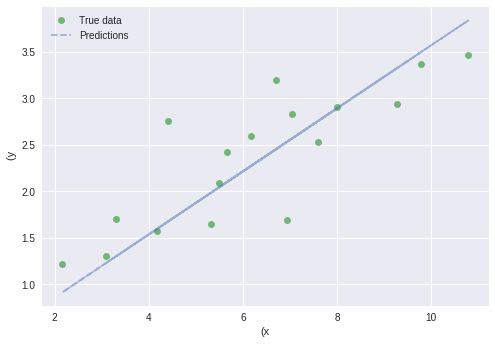

In [157]:
# Clear figure
#plt.clf()

# Get predictions
#predicted = model(Variable((x_T))).data.numpy()
predicted = model.cpu()(Variable((x_T))).data.numpy()



# Plot true data
plt.plot(x_T.numpy(), y_T.numpy(), 'go', label= 'True data', alpha=.5)

# Plot predictions
plt.plot(x_T.numpy(), predicted, '--', label="Predictions", alpha=.5)

plt.xlabel("(x")
plt.ylabel(" (y")

# Legend and plot
plt.legend(loc='best')
plt.show()

The values of m and b can be obtained using this statement **print(model.state_dict())**

In [0]:
print(model.state_dict())

Therefore the equation of the line is y = **?**x + **?**

# **CUDA**

Testing cuda with **torch.cuda.is_available()**  😊😊😊😊

In [0]:
# CPU 
tensor_cpu = torch.ones(3,3)

In [0]:
# CPU to GPU
if torch.cuda.is_available():
    tensor_cpu.cuda()

In [0]:
#GPU to CPU
tensor_cpu.cpu()

In [98]:
print(torch.cuda.is_available())

True


GPU:** 2** things must be on GPU

1.   **model** 
```
if torch.cuda.is_available():
        model.cuda()
 else:
        model
```
2.   **Variable**
    
```
if torch.cuda.is_available():
          inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()
        
      else:
          inputs, labels = Variable(inputs), Variable(labels)
```
    
  

**NOTE**: Convert the model to CPU for prediction : **model.cp()**